In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys, os, re, glob, parse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('muted')

local_ligan_dir = 'C:\\Users\mtr22\Code\liGAN'
csb_ligan_dir = 'D:\\net\pulsar\home\koes\mtr22\gan'
bridges_ligan_dir = 'E:\\pylon5\mc5phpp\mtragoza\liGAN'

assert os.path.exists(local_ligan_dir)
sys.path.append(local_ligan_dir)

print(os.path.exists(csb_ligan_dir), os.path.exists(bridges_ligan_dir))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
True True


In [8]:
assert os.path.exists(bridges_ligan_dir)
work_dir = os.path.join(bridges_ligan_dir, 'train_molport')
os.chdir(work_dir)
os.getcwd(), os.listdir()

('E:\\pylon5\\mc5phpp\\mtragoza\\liGAN\\train_molport',
 ['ae_disc_x_0_10000_r_none__528242_11_lig.sdf',
  'ae_disc_x_0_10000_r_none__528242_11_lig_fit.sdf',
  'ae_disc_x_0_10000_r_none__528242_11_lig_gen_fit.sdf',
  'bridges_train.sh',
  'data',
  'data_model.params',
  'disc_model.params',
  'fit_molport',
  'fit_pubchem',
  'gen_e_disc_x_0.molportFULL_rand_.0.0.png',
  'gen_e_disc_x_0.molportFULL_rand_.0.0.training_output',
  'gen_e_disc_x_0.molportFULL_rand_.0.0_disc_iter_0.caffemodel',
  'gen_e_disc_x_0.molportFULL_rand_.0.0_disc_iter_0.solverstate',
  'gen_e_disc_x_0.molportFULL_rand_.0.0_gen_iter_0.caffemodel',
  'gen_e_disc_x_0.molportFULL_rand_.0.0_gen_iter_0.solverstate',
  'gen_model.params',
  'generate.sh',
  'job.params',
  'loss_types',
  'models',
  'mol_validity',
  'mol_validity.sh',
  'my_lig_map',
  'my_rec_map',
  'pending_jobs_killed_5_18_20',
  'setup.sh',
  'solvers',
  'test',
  'test_molgrid_data_layer.py',
  'train_job_ids_5_14_20',
  'train_job_ids_5_17_20',

In [9]:
def read_err_file(err_file):
    error = None
    with open(err_file, encoding='utf-8') as f:
        for line in f:
            if not re.match('Warning.*', line) \
               and re.match(r'.*(Error|Exception|error|fault|failed).*', line):
                error = line.rstrip()
    return error

indent = 4*' '
train_output_files = []
for expt_name in ['loss_types']:
    
    for job_name in reversed(sorted(os.listdir(expt_name))):
        
        err_files = []
        for err_file in os.listdir(expt_name + '/' + job_name):

            m = re.match(r'slurm-(\d+)\.err', err_file)
            if not m:
                continue
            
            job_id = int(m.group(1))
            err_file = os.path.join(expt_name, job_name, err_file)
            error = read_err_file(err_file)
            err_files.append((job_id, err_file, error))
            
        for job_id, err_file, error in sorted(err_files):
            print(err_file + '\t' + str(error)[:72])
        
        try:
            train_output_file = glob.glob('/'.join([expt_name, job_name, str(job_id), '*.training_output']))[0]
            train_output_files.append(train_output_file)
        except IndexError:
            pass
            
        print()

len(train_output_files)

loss_types\gen_e_disc_x_4\slurm-8216436.err	RuntimeError: CUDA Error: invalid configuration argument
loss_types\gen_e_disc_x_4\slurm-8353369.err	RuntimeError: CUDA Error: invalid configuration argument
loss_types\gen_e_disc_x_4\slurm-8392863.err	slurmstepd: error: *** JOB 8392863 ON gpu055 CANCELLED AT 2020-04-07T02:
loss_types\gen_e_disc_x_4\slurm-8499280.err	slurmstepd: error: *** JOB 8499280 ON gpu054 CANCELLED AT 2020-04-11T03:
loss_types\gen_e_disc_x_4\slurm-8581663.err	slurmstepd: error: *** JOB 8581663 ON gpu052 CANCELLED AT 2020-04-13T10:
loss_types\gen_e_disc_x_4\slurm-8602074.err	slurmstepd: error: *** JOB 8602074 ON gpu049 CANCELLED AT 2020-04-14T13:
loss_types\gen_e_disc_x_4\slurm-8642417.err	slurmstepd: error: *** JOB 8642417 ON gpu052 CANCELLED AT 2020-04-15T22:
loss_types\gen_e_disc_x_4\slurm-8723319.err	slurmstepd: error: *** JOB 8723319 ON gpu050 CANCELLED AT 2020-04-19T00:
loss_types\gen_e_disc_x_4\slurm-8740591.err	slurmstepd: error: *** JOB 8740591 ON gpu049 CANCELL


loss_types\gen_e_disc_x_0\slurm-8091337.err	FileNotFoundError: [Errno 2] No such file or directory: 'data_48_0.5.mod
loss_types\gen_e_disc_x_0\slurm-8101010.err	slurmstepd: error: Detected 1 oom-kill event(s) in step 8101010.batch cg
loss_types\gen_e_disc_x_0\slurm-8101154.err	slurmstepd: error: Detected 1 oom-kill event(s) in step 8101154.batch cg
loss_types\gen_e_disc_x_0\slurm-8101202.err	ImportError: libhdf5.so.8: cannot open shared object file: No such file 
loss_types\gen_e_disc_x_0\slurm-8104621.err	slurmstepd: error: Detected 1 oom-kill event(s) in step 8104621.batch cg
loss_types\gen_e_disc_x_0\slurm-8106414.err	slurmstepd: error: Detected 1 oom-kill event(s) in step 8106414.batch cg
loss_types\gen_e_disc_x_0\slurm-8106485.err	slurmstepd: error: Detected 1 oom-kill event(s) in step 8106485.batch cg
loss_types\gen_e_disc_x_0\slurm-8106520.err	slurmstepd: error: Detected 1 oom-kill event(s) in step 8106520.batch cg
loss_types\gen_e_disc_x_0\slurm-8158438.err	slurmstepd: error: 


loss_types\gen_e_disc_w_2\slurm-8216429.err	RuntimeError: CUDA Error: invalid configuration argument
loss_types\gen_e_disc_w_2\slurm-8353362.err	RuntimeError: CUDA Error: invalid configuration argument
loss_types\gen_e_disc_w_2\slurm-8392856.err	slurmstepd: error: *** JOB 8392856 ON gpu054 CANCELLED AT 2020-04-06T21:
loss_types\gen_e_disc_w_2\slurm-8499273.err	slurmstepd: error: *** JOB 8499273 ON gpu053 CANCELLED AT 2020-04-10T07:
loss_types\gen_e_disc_w_2\slurm-8581656.err	slurmstepd: error: *** JOB 8581656 ON gpu053 CANCELLED AT 2020-04-12T22:
loss_types\gen_e_disc_w_2\slurm-8602067.err	slurmstepd: error: *** JOB 8602067 ON gpu053 CANCELLED AT 2020-04-14T03:
loss_types\gen_e_disc_w_2\slurm-8642410.err	slurmstepd: error: *** JOB 8642410 ON gpu053 CANCELLED AT 2020-04-15T22:
loss_types\gen_e_disc_w_2\slurm-8663252.err	slurmstepd: error: *** JOB 8663252 ON gpu054 CANCELLED AT 2020-04-17T01:
loss_types\gen_e_disc_w_2\slurm-8723312.err	slurmstepd: error: *** JOB 8723312 ON gpu052 CANCEL


loss_types\gen_a_disc_x_3\slurm-8216425.err	RuntimeError: CUDA Error: invalid configuration argument
loss_types\gen_a_disc_x_3\slurm-8353358.err	slurmstepd: error: *** JOB 8353358 ON gpu052 CANCELLED AT 2020-04-04T01:
loss_types\gen_a_disc_x_3\slurm-8392852.err	slurmstepd: error: *** JOB 8392852 ON gpu049 CANCELLED AT 2020-04-06T13:
loss_types\gen_a_disc_x_3\slurm-8499269.err	slurmstepd: error: *** JOB 8499269 ON gpu055 CANCELLED AT 2020-04-10T07:
loss_types\gen_a_disc_x_3\slurm-8581652.err	slurmstepd: error: *** JOB 8581652 ON gpu052 CANCELLED AT 2020-04-12T22:
loss_types\gen_a_disc_x_3\slurm-8602063.err	slurmstepd: error: *** JOB 8602063 ON gpu051 CANCELLED AT 2020-04-14T01:
loss_types\gen_a_disc_x_3\slurm-8642406.err	slurmstepd: error: *** JOB 8642406 ON gpu051 CANCELLED AT 2020-04-15T22:
loss_types\gen_a_disc_x_3\slurm-8663248.err	slurmstepd: error: *** JOB 8663248 ON gpu050 CANCELLED AT 2020-04-16T23:
loss_types\gen_a_disc_x_3\slurm-8723308.err	slurmstepd: error: *** JOB 8723308 


loss_types\gen_a_disc_w_4\slurm-8216421.err	RuntimeError: CUDA Error: invalid configuration argument
loss_types\gen_a_disc_w_4\slurm-8353354.err	slurmstepd: error: *** JOB 8353354 ON gpu051 CANCELLED AT 2020-04-04T01:
loss_types\gen_a_disc_w_4\slurm-8392848.err	slurmstepd: error: *** JOB 8392848 ON gpu056 CANCELLED AT 2020-04-06T09:
loss_types\gen_a_disc_w_4\slurm-8499265.err	slurmstepd: error: *** JOB 8499265 ON gpu051 CANCELLED AT 2020-04-10T04:
loss_types\gen_a_disc_w_4\slurm-8581648.err	slurmstepd: error: *** JOB 8581648 ON gpu056 CANCELLED AT 2020-04-12T22:
loss_types\gen_a_disc_w_4\slurm-8602059.err	slurmstepd: error: *** JOB 8602059 ON gpu057 CANCELLED AT 2020-04-14T01:
loss_types\gen_a_disc_w_4\slurm-8642402.err	slurmstepd: error: *** JOB 8642402 ON gpu054 CANCELLED AT 2020-04-15T10:
loss_types\gen_a_disc_w_4\slurm-8663244.err	slurmstepd: error: *** JOB 8663244 ON gpu049 CANCELLED AT 2020-04-16T17:
loss_types\gen_a_disc_w_4\slurm-8723303.err	slurmstepd: error: *** JOB 8723303 


loss_types\gen_a_disc_w_0\slurm-8091334.err	FileNotFoundError: [Errno 2] No such file or directory: 'data_48_0.5.mod
loss_types\gen_a_disc_w_0\slurm-8216417.err	RuntimeError: CUDA Error: invalid configuration argument
loss_types\gen_a_disc_w_0\slurm-8353350.err	slurmstepd: error: *** JOB 8353350 ON gpu050 CANCELLED AT 2020-04-04T01:
loss_types\gen_a_disc_w_0\slurm-8392844.err	slurmstepd: error: *** JOB 8392844 ON gpu049 CANCELLED AT 2020-04-06T09:
loss_types\gen_a_disc_w_0\slurm-8499261.err	slurmstepd: error: *** JOB 8499261 ON gpu056 CANCELLED AT 2020-04-10T03:
loss_types\gen_a_disc_w_0\slurm-8581644.err	slurmstepd: error: *** JOB 8581644 ON gpu055 CANCELLED AT 2020-04-12T22:
loss_types\gen_a_disc_w_0\slurm-8602055.err	slurmstepd: error: *** JOB 8602055 ON gpu050 CANCELLED AT 2020-04-14T01:
loss_types\gen_a_disc_w_0\slurm-8642398.err	slurmstepd: error: *** JOB 8642398 ON gpu053 CANCELLED AT 2020-04-15T10:
loss_types\gen_a_disc_w_0\slurm-8663240.err	slurmstepd: error: *** JOB 8663240 


loss_types\ae_disc_x_1\slurm-8581640.err	train.py: error: argument --cont_iter: expected one argument
loss_types\ae_disc_x_1\slurm-8602051.err	FileNotFoundError: [Errno 2] No such file or directory: '../../../models
loss_types\ae_disc_x_1\slurm-8631255.err	slurmstepd: error: *** JOB 8631255 ON gpu054 CANCELLED AT 2020-04-14T22:
loss_types\ae_disc_x_1\slurm-8642394.err	slurmstepd: error: *** JOB 8642394 ON gpu052 CANCELLED AT 2020-04-15T10:
loss_types\ae_disc_x_1\slurm-8663236.err	slurmstepd: error: *** JOB 8663236 ON gpu050 CANCELLED AT 2020-04-16T11:
loss_types\ae_disc_x_1\slurm-8696109.err	slurmstepd: error: *** JOB 8696109 ON gpu054 CANCELLED AT 2020-04-17T13:
loss_types\ae_disc_x_1\slurm-8723295.err	slurmstepd: error: *** JOB 8723295 ON gpu050 CANCELLED AT 2020-04-18T06:
loss_types\ae_disc_x_1\slurm-8740568.err	slurmstepd: error: *** JOB 8740568 ON gpu051 CANCELLED AT 2020-04-19T17:
loss_types\ae_disc_x_1\slurm-8754091.err	slurmstepd: error: *** JOB 8754091 ON gpu052 CANCELLED AT 


loss_types\ae_disc_w_2\slurm-8581636.err	train.py: error: argument --cont_iter: expected one argument
loss_types\ae_disc_w_2\slurm-8602047.err	FileNotFoundError: [Errno 2] No such file or directory: '../../../models
loss_types\ae_disc_w_2\slurm-8631251.err	slurmstepd: error: *** JOB 8631251 ON gpu051 CANCELLED AT 2020-04-14T22:
loss_types\ae_disc_w_2\slurm-8642390.err	slurmstepd: error: *** JOB 8642390 ON gpu050 CANCELLED AT 2020-04-15T10:
loss_types\ae_disc_w_2\slurm-8663232.err	slurmstepd: error: *** JOB 8663232 ON gpu052 CANCELLED AT 2020-04-16T10:
loss_types\ae_disc_w_2\slurm-8696105.err	slurmstepd: error: *** JOB 8696105 ON gpu049 CANCELLED AT 2020-04-17T11:
loss_types\ae_disc_w_2\slurm-8723291.err	slurmstepd: error: *** JOB 8723291 ON gpu053 CANCELLED AT 2020-04-18T06:
loss_types\ae_disc_w_2\slurm-8740564.err	slurmstepd: error: *** JOB 8740564 ON gpu050 CANCELLED AT 2020-04-19T13:
loss_types\ae_disc_w_2\slurm-8754087.err	slurmstepd: error: *** JOB 8754087 ON gpu055 CANCELLED AT 

30

In [10]:
vae_name_format = 'gen_{gen_loss_type}_disc_{disc_loss_type}_{random_seed}'
ae_name_format  = 'ae_disc_{disc_loss_type}_{random_seed}'

train_job_dfs = []
for train_output_file in train_output_files:
    try:
        train_job_df = pd.read_csv(train_output_file, sep=' ')
        print(train_output_file)
    except Exception as e:
        print(train_output_file, e, file=sys.stderr)
        continue
    
    expt_name, job_name, job_id = os.path.dirname(train_output_file).split('/')
    out_file = '/'.join([expt_name, job_name, 'slurm-{}.out'.format(job_id)])
    err_file = '/'.join([expt_name, job_name, 'slurm-{}.err'.format(job_id)])
    
    train_job_df['expt_name'] = expt_name
    train_job_df['job_name'] = job_name
    train_job_df['model_name'] = job_name.rsplit('_', 1)[0]
    train_job_df['job_id'] = int(job_id)
    train_job_df['out_file'] = out_file
    train_job_df['err_file'] = err_file
    
    # get params from job_name
    try:
        job_params = parse.parse(vae_name_format, job_name).named
        variational = True
    except:
        job_params = parse.parse(ae_name_format, job_name).named
        variational = False
        
    train_job_df['variational'] = variational
    if not variational:
        train_job_df['gen_loss_type'] = 'e'
    
    for param, value in job_params.items():
        train_job_df[param] = value
    
    # get error from err_file
    #train_job_df['job_error'] = read_err_file(err_file)
    
    train_job_df = train_job_df.rename(columns=dict({'test_data': 'phase'}))
    
    train_job_dfs.append(train_job_df)

train_df = pd.concat(train_job_dfs)
train_df.set_index(['expt_name', 'job_name', 'job_id'])

loss_types/gen_e_disc_x_4/9111886\gen_e_disc_x_4.molportFULL_rand_.4.0.training_output
loss_types/gen_e_disc_x_3/9111882\gen_e_disc_x_3.molportFULL_rand_.3.0.training_output
loss_types/gen_e_disc_x_2/9111878\gen_e_disc_x_2.molportFULL_rand_.2.0.training_output
loss_types/gen_e_disc_x_1/9144753\gen_e_disc_x_1.molportFULL_rand_.1.0.training_output
loss_types/gen_e_disc_x_0/9156408\gen_e_disc_x_0.molportFULL_rand_.0.0.training_output
loss_types/gen_e_disc_w_4/9111888\gen_e_disc_w_4.molportFULL_rand_.4.0.training_output
loss_types/gen_e_disc_w_3/9111884\gen_e_disc_w_3.molportFULL_rand_.3.0.training_output
loss_types/gen_e_disc_w_2/9111880\gen_e_disc_w_2.molportFULL_rand_.2.0.training_output
loss_types/gen_e_disc_w_1/9111876\gen_e_disc_w_1.molportFULL_rand_.1.0.training_output
loss_types/gen_e_disc_w_0/9156410\gen_e_disc_w_0.molportFULL_rand_.0.0.training_output
loss_types/gen_a_disc_x_4/9111897\gen_a_disc_x_4.molportFULL_rand_.4.0.training_output
loss_types/gen_a_disc_x_3/9111895\gen_a_dis

loss_types/gen_a_disc_w_2/9111894\gen_a_disc_w_2.molportFULL_rand_.2.0.training_output No columns to parse from file


loss_types/gen_a_disc_w_1/9111892\gen_a_disc_w_1.molportFULL_rand_.1.0.training_output
loss_types/gen_a_disc_w_0/9111890\gen_a_disc_w_0.molportFULL_rand_.0.0.training_output
loss_types/ae_disc_x_4/9111885\ae_disc_x_4.molportFULL_rand_.4.0.training_output
loss_types/ae_disc_x_3/9111881\ae_disc_x_3.molportFULL_rand_.3.0.training_output
loss_types/ae_disc_x_2/9111877\ae_disc_x_2.molportFULL_rand_.2.0.training_output
loss_types/ae_disc_x_1/9144752\ae_disc_x_1.molportFULL_rand_.1.0.training_output
loss_types/ae_disc_x_0/9156407\ae_disc_x_0.molportFULL_rand_.0.0.training_output
loss_types/ae_disc_w_4/9111887\ae_disc_w_4.molportFULL_rand_.4.0.training_output
loss_types/ae_disc_w_3/9111883\ae_disc_w_3.molportFULL_rand_.3.0.training_output
loss_types/ae_disc_w_2/9111879\ae_disc_w_2.molportFULL_rand_.2.0.training_output
loss_types/ae_disc_w_1/9111875\ae_disc_w_1.molportFULL_rand_.1.0.training_output
loss_types/ae_disc_w_0/9156409\ae_disc_w_0.molportFULL_rand_.0.0.training_output


iteration  phase  disc_log_loss  disc_iter  \
expt_name  job_name       job_id                                                
loss_types gen_e_disc_x_4 9111886          0  train       0.697052        0.0   
                          9111886          0   test       0.697082        0.0   
                          9111886        100  train       0.681753      100.0   
                          9111886        100   test       0.681730      100.0   
                          9111886        200  train       0.656574      200.0   
...                                      ...    ...            ...        ...   
           ae_disc_w_0    9156409      80400   test            NaN    80400.0   
                          9156409      80500  train            NaN    80500.0   
                          9156409      80500   test            NaN    80500.0   
                          9156409      80600  train            NaN    80600.0   
                          9156409      80600   test            NaN    80600.0   

                                   disc_grad_norm  gen_kldiv_loss  \
expt_name  job_name       job_id                                    
loss_types gen_e_disc_x_4 9111886             1.0        0.000051   
                          9111886             1.0        0.000051   
                          9111886             1.0        0.333457   
                          9111886             1.0        0.343956   
                          9111886             1.0        8.621713   
...                                           ...             ...   
           ae_disc_w_0    9156409             1.0             NaN   
                          9156409             1.0             NaN   
                          9156409             1.0             NaN   
                          9156409             1.0             NaN   
                          9156409             1.0             NaN   

                                   gen_L2_loss  gen_adv_log_loss  gen_iter  \
expt_name  job_name       job_id                                             
loss_types gen_e_disc_x_4 9111886  1241.218555          0.689898       0.0   
                          9111886  1240.676245          0.689873       0.0   
                          9111886   689.784344          0.688411     100.0   
                          9111886   679.934235          0.688418     100.0   
                          9111886   668.121637          0.693098     200.0   
...                                        ...               ...       ...   
           ae_disc_w_0    9156409    27.807389               NaN   80400.0   
                          9156409    31.082079               NaN   80500.0   
                          9156409    29.141840               NaN   80500.0   
                          9156409    25.925542               NaN   80600.0   
                          9156409    26.625665               NaN   80600.0   

                                   gen_grad_norm  ...    model_name  \
expt_name  job_name       job_id                  ...                 
loss_types gen_e_disc_x_4 9111886   45759.531590  ...  gen_e_disc_x   
                          9111886   46355.010923  ...  gen_e_disc_x   
                          9111886     871.352242  ...  gen_e_disc_x   
                          9111886     987.438747  ...  gen_e_disc_x   
                          9111886    6688.326886  ...  gen_e_disc_x   
...                                          ...  ...           ...   
           ae_disc_w_0    9156409    2317.416435  ...     ae_disc_w   
                          9156409    3211.675040  ...     ae_disc_w   
                          9156409    2986.842463  ...     ae_disc_w   
                          9156409    1717.456487  ...     ae_disc_w   
                          9156409    1764.019732  ...     ae_disc_w   

                                                                      out_file  \
expt_name  job_name       job_id                              

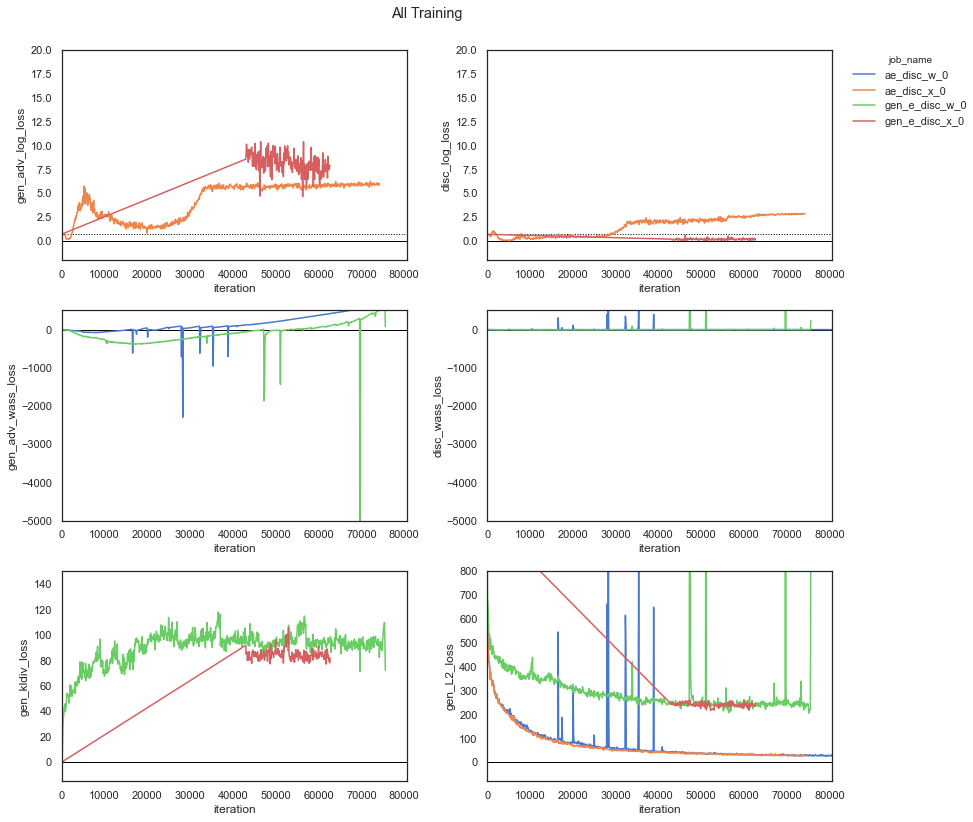

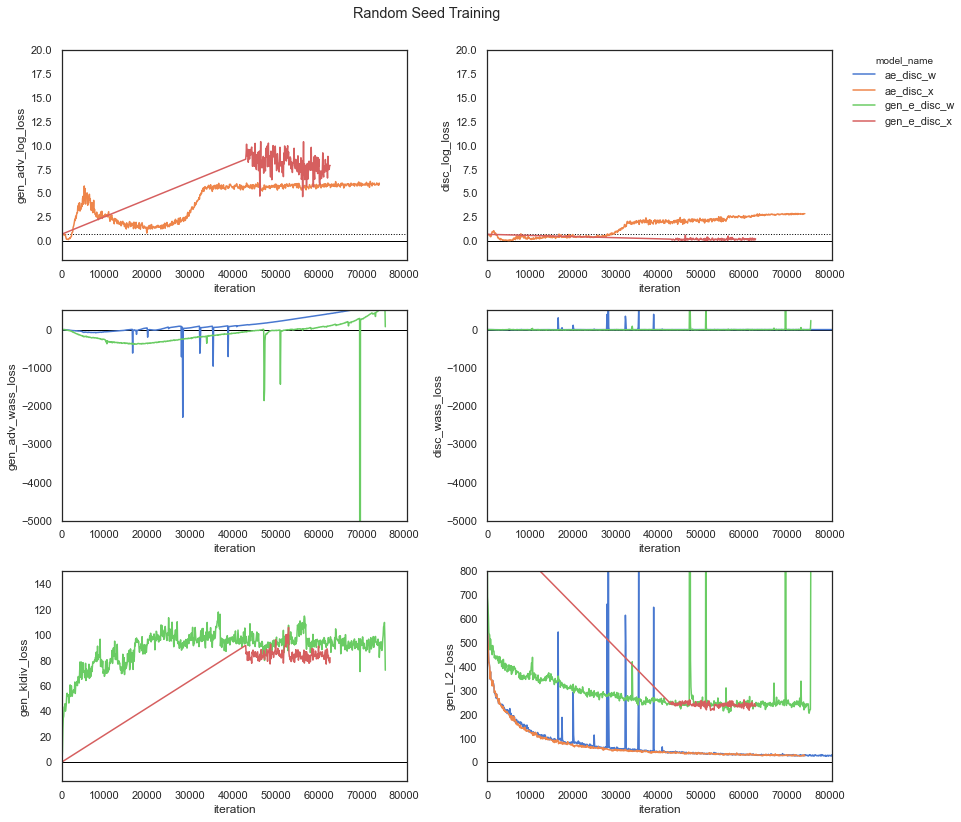

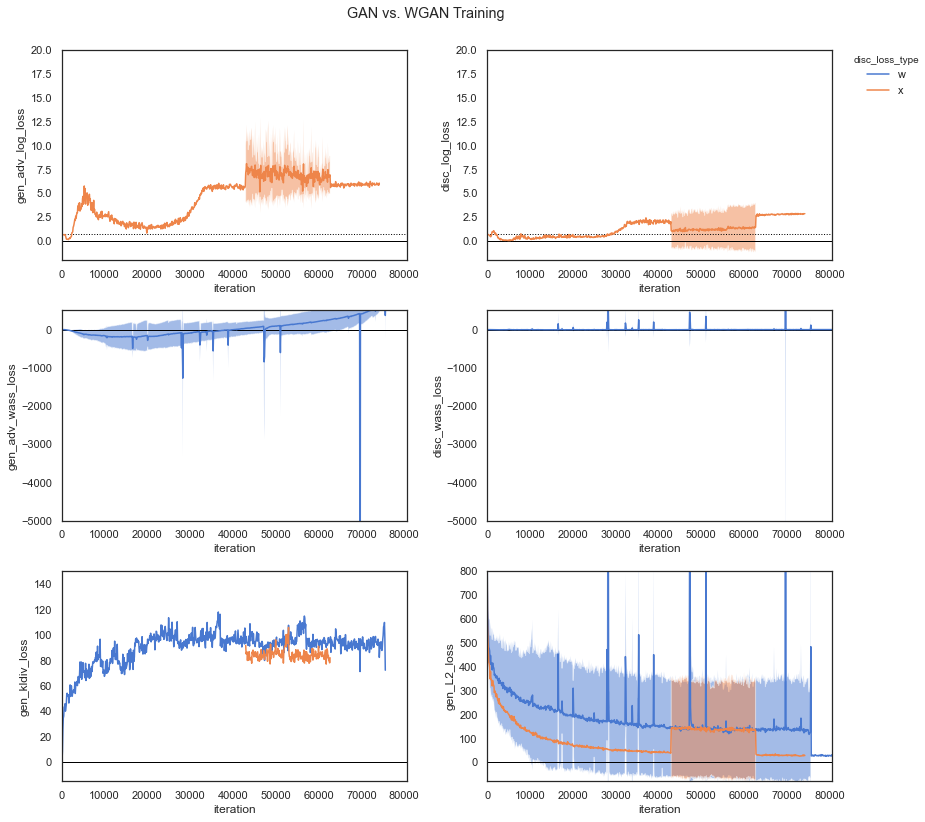

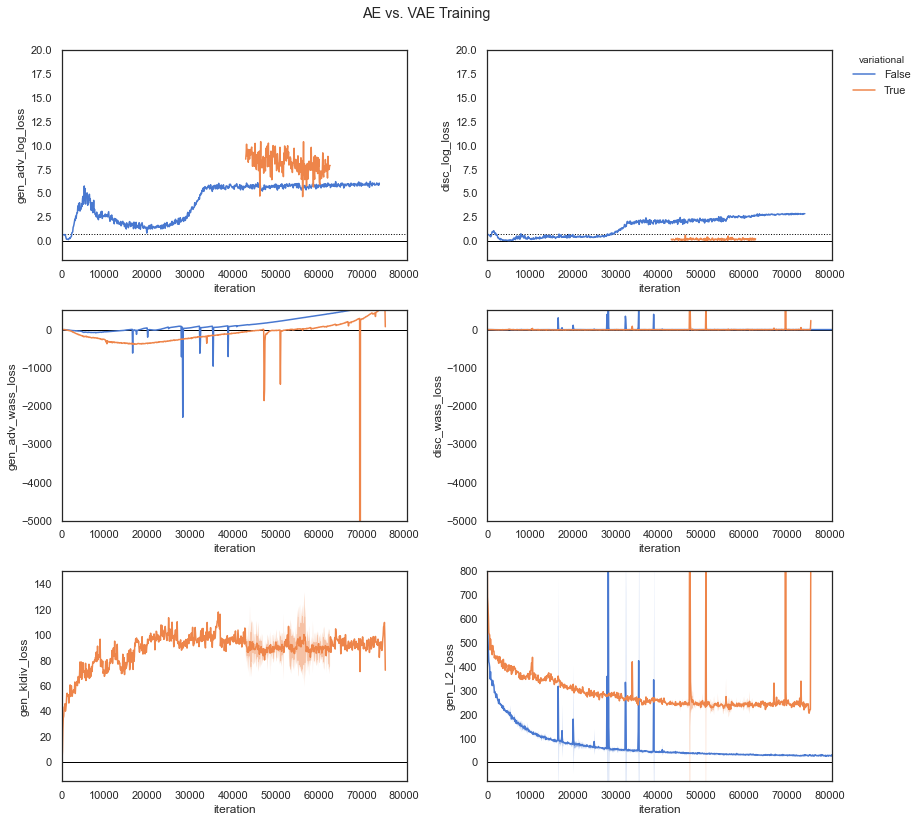

In [12]:
from collections import OrderedDict
from results import plot_lines

set_ylim = True
ylim = OrderedDict([
    ('gen_adv_log_loss',  (-2, 20)),
    ('disc_log_loss',     (-2, 20)),    
    ('gen_adv_wass_loss', (-5000, 500)),
    ('disc_wass_loss',    (-5000, 500)),
    ('gen_kldiv_loss',    (-15, 150)),
    ('gen_L2_loss',       (-80, 800)),
])
y = ylim.keys()

if not set_ylim:
    ylim = None

plot_df = train_df[(train_df['phase'] == 'train') & \
                   (train_df['gen_loss_type'] == 'e') & \
                   (train_df['random_seed'] == '0')]

fig = plot_lines('train_molport_lines.png', plot_df,
                 x='iteration', y=y,  hue='job_name',
                 n_cols=2, height=4, width=6, ylim=ylim,
                 title='All Training')

fig = plot_lines('train_molport_lines_random_seed.png', plot_df,
                 x='iteration', y=y,  hue='model_name',
                 n_cols=2, height=4, width=6, ylim=ylim,
                 title='Random Seed Training')

fig = plot_lines('train_molport_lines_GAN_vs_WGAN.png', plot_df,
                 x='iteration', y=y,  hue='disc_loss_type',
                 n_cols=2, height=4, width=6, ylim=ylim,
                 title='GAN vs. WGAN Training')

fig = plot_lines('train_molport_lines_AE_vs_VAE.png', plot_df,
                 x='iteration', y=y,  hue='variational',
                 n_cols=2, height=4, width=6, ylim=ylim,
                 title='AE vs. VAE Training')

In [14]:
assert os.path.exists(csb_ligan_dir)
os.chdir(os.path.join(csb_ligan_dir, 'train_molport'))
os.getcwd(), os.listdir()

('D:\\net\\pulsar\\home\\koes\\mtr22\\gan\\train_molport',
 ['data',
  'fit_molport',
  'fit_molport_Emin_strips.png',
  'fit_molport_drug_strips.png',
  'fit_molport_fit_strips.png',
  'fit_molport_grid_strips.png',
  'fit_molport_sim_strips.png',
  'fit_molport_valid_strips.png',
  'fit_pubchem',
  'models',
  'my_lig_map',
  'my_rec_map',
  'test_molgrid.py',
  'weights'])

In [15]:
indent = '    '
gen_metric_files = []

for expt_name in ['fit_molport']:
    print(expt_name)
    
    for job_name in os.listdir(expt_name):
        
        if not re.match(r'(ae|gen).*', job_name):
            continue

        print(indent + job_name)
        
        job_ids = []
        for err_file in os.listdir(expt_name + '/' + job_name):
            
            m = re.match(r'slurm-(\d+)_(\d+)\.err', err_file)
            if not m:
                continue
                
            print(2*indent + err_file)
                
            job_id = int(m.group(1))
            array_idx = int(m.group(2))
            
            if job_id not in job_ids:
                job_ids.append(job_id)
                
        job_id = sorted(job_ids)[-1] # most recent job ids, but array idxs could be missing
        
        gen_metric_pat = expt_name + '/' + job_name + '/*.gen_metrics'
        gen_metric_files.extend(glob.glob(gen_metric_pat))
        print()

len(gen_metric_files)

fit_molport
    ae_disc_x_0_10000_r_dist
        slurm-605650_1.err
        slurm-605651_4294967294.err
        slurm-605652_4294967294.err
        slurm-605653_4294967294.err
        slurm-605654_2.err
        slurm-605655_2.err
        slurm-605657_2.err
        slurm-606788_2.err
        slurm-606789_2.err
        slurm-606790_2.err
        slurm-606791_1.err
        slurm-606791_10.err
        slurm-606791_100.err
        slurm-606791_11.err
        slurm-606791_12.err
        slurm-606791_13.err
        slurm-606791_14.err
        slurm-606791_15.err
        slurm-606791_16.err
        slurm-606791_17.err
        slurm-606791_18.err
        slurm-606791_19.err
        slurm-606791_2.err
        slurm-606791_20.err
        slurm-606791_21.err
        slurm-606791_22.err
        slurm-606791_23.err
        slurm-606791_24.err
        slurm-606791_25.err
        slurm-606791_26.err
        slurm-606791_27.err
        slurm-606791_28.err
        slurm-606791_29.err
        slurm-60679


    ae_disc_x_0_10000_r_none
        slurm-606792_1.err
        slurm-606792_10.err
        slurm-606792_100.err
        slurm-606792_11.err
        slurm-606792_12.err
        slurm-606792_13.err
        slurm-606792_14.err
        slurm-606792_15.err
        slurm-606792_16.err
        slurm-606792_17.err
        slurm-606792_18.err
        slurm-606792_19.err
        slurm-606792_2.err
        slurm-606792_20.err
        slurm-606792_21.err
        slurm-606792_22.err
        slurm-606792_23.err
        slurm-606792_24.err
        slurm-606792_25.err
        slurm-606792_26.err
        slurm-606792_27.err
        slurm-606792_28.err
        slurm-606792_29.err
        slurm-606792_3.err
        slurm-606792_30.err
        slurm-606792_31.err
        slurm-606792_32.err
        slurm-606792_33.err
        slurm-606792_34.err
        slurm-606792_35.err
        slurm-606792_36.err
        slurm-606792_37.err
        slurm-606792_38.err
        slurm-606792_39.err
        slurm-606792


    ae_disc_x_0_20000_r_dist
        slurm-606793_1.err
        slurm-606793_10.err
        slurm-606793_100.err
        slurm-606793_11.err
        slurm-606793_12.err
        slurm-606793_13.err
        slurm-606793_14.err
        slurm-606793_15.err
        slurm-606793_16.err
        slurm-606793_17.err
        slurm-606793_18.err
        slurm-606793_19.err
        slurm-606793_2.err
        slurm-606793_20.err
        slurm-606793_21.err
        slurm-606793_22.err
        slurm-606793_23.err
        slurm-606793_24.err
        slurm-606793_25.err
        slurm-606793_26.err
        slurm-606793_27.err
        slurm-606793_28.err
        slurm-606793_29.err
        slurm-606793_3.err
        slurm-606793_30.err
        slurm-606793_31.err
        slurm-606793_32.err
        slurm-606793_33.err
        slurm-606793_34.err
        slurm-606793_35.err
        slurm-606793_36.err
        slurm-606793_37.err
        slurm-606793_38.err
        slurm-606793_39.err
        slurm-606793


    ae_disc_x_0_20000_r_none
        slurm-606794_1.err
        slurm-606794_10.err
        slurm-606794_100.err
        slurm-606794_11.err
        slurm-606794_12.err
        slurm-606794_13.err
        slurm-606794_14.err
        slurm-606794_15.err
        slurm-606794_16.err
        slurm-606794_17.err
        slurm-606794_18.err
        slurm-606794_19.err
        slurm-606794_2.err
        slurm-606794_20.err
        slurm-606794_21.err
        slurm-606794_22.err
        slurm-606794_23.err
        slurm-606794_24.err
        slurm-606794_25.err
        slurm-606794_26.err
        slurm-606794_27.err
        slurm-606794_28.err
        slurm-606794_29.err
        slurm-606794_3.err
        slurm-606794_30.err
        slurm-606794_31.err
        slurm-606794_32.err
        slurm-606794_33.err
        slurm-606794_34.err
        slurm-606794_35.err
        slurm-606794_36.err
        slurm-606794_37.err
        slurm-606794_38.err
        slurm-606794_39.err
        slurm-606794


    ae_disc_x_0_30000_r_dist
        slurm-606795_1.err
        slurm-606795_10.err
        slurm-606795_100.err
        slurm-606795_11.err
        slurm-606795_12.err
        slurm-606795_13.err
        slurm-606795_14.err
        slurm-606795_15.err
        slurm-606795_16.err
        slurm-606795_17.err
        slurm-606795_18.err
        slurm-606795_19.err
        slurm-606795_2.err
        slurm-606795_20.err
        slurm-606795_21.err
        slurm-606795_22.err
        slurm-606795_23.err
        slurm-606795_24.err
        slurm-606795_25.err
        slurm-606795_26.err
        slurm-606795_27.err
        slurm-606795_28.err
        slurm-606795_29.err
        slurm-606795_3.err
        slurm-606795_30.err
        slurm-606795_31.err
        slurm-606795_32.err
        slurm-606795_33.err
        slurm-606795_34.err
        slurm-606795_35.err
        slurm-606795_36.err
        slurm-606795_37.err
        slurm-606795_38.err
        slurm-606795_39.err
        slurm-606795


    ae_disc_x_0_30000_r_none
        slurm-606796_1.err
        slurm-606796_10.err
        slurm-606796_100.err
        slurm-606796_11.err
        slurm-606796_12.err
        slurm-606796_13.err
        slurm-606796_14.err
        slurm-606796_15.err
        slurm-606796_16.err
        slurm-606796_17.err
        slurm-606796_18.err
        slurm-606796_19.err
        slurm-606796_2.err
        slurm-606796_20.err
        slurm-606796_21.err
        slurm-606796_22.err
        slurm-606796_23.err
        slurm-606796_24.err
        slurm-606796_25.err
        slurm-606796_26.err
        slurm-606796_27.err
        slurm-606796_28.err
        slurm-606796_29.err
        slurm-606796_3.err
        slurm-606796_30.err
        slurm-606796_31.err
        slurm-606796_32.err
        slurm-606796_33.err
        slurm-606796_34.err
        slurm-606796_35.err
        slurm-606796_36.err
        slurm-606796_37.err
        slurm-606796_38.err
        slurm-606796_39.err
        slurm-606796


    ae_disc_x_0_40000_r_dist
        slurm-606797_1.err
        slurm-606797_10.err
        slurm-606797_100.err
        slurm-606797_11.err
        slurm-606797_12.err
        slurm-606797_13.err
        slurm-606797_14.err
        slurm-606797_15.err
        slurm-606797_16.err
        slurm-606797_17.err
        slurm-606797_18.err
        slurm-606797_19.err
        slurm-606797_2.err
        slurm-606797_20.err
        slurm-606797_21.err
        slurm-606797_22.err
        slurm-606797_23.err
        slurm-606797_24.err
        slurm-606797_25.err
        slurm-606797_26.err
        slurm-606797_27.err
        slurm-606797_28.err
        slurm-606797_29.err
        slurm-606797_3.err
        slurm-606797_30.err
        slurm-606797_31.err
        slurm-606797_32.err
        slurm-606797_33.err
        slurm-606797_34.err
        slurm-606797_35.err
        slurm-606797_36.err
        slurm-606797_37.err
        slurm-606797_38.err
        slurm-606797_39.err
        slurm-606797


    ae_disc_x_0_40000_r_none
        slurm-606798_1.err
        slurm-606798_10.err
        slurm-606798_100.err
        slurm-606798_11.err
        slurm-606798_12.err
        slurm-606798_13.err
        slurm-606798_14.err
        slurm-606798_15.err
        slurm-606798_16.err
        slurm-606798_17.err
        slurm-606798_18.err
        slurm-606798_19.err
        slurm-606798_2.err
        slurm-606798_20.err
        slurm-606798_21.err
        slurm-606798_22.err
        slurm-606798_23.err
        slurm-606798_24.err
        slurm-606798_25.err
        slurm-606798_26.err
        slurm-606798_27.err
        slurm-606798_28.err
        slurm-606798_29.err
        slurm-606798_3.err
        slurm-606798_30.err
        slurm-606798_31.err
        slurm-606798_32.err
        slurm-606798_33.err
        slurm-606798_34.err
        slurm-606798_35.err
        slurm-606798_36.err
        slurm-606798_37.err
        slurm-606798_38.err
        slurm-606798_39.err
        slurm-606798


    ae_disc_x_0_50000_r_dist
        slurm-606799_1.err
        slurm-606799_10.err
        slurm-606799_100.err
        slurm-606799_11.err
        slurm-606799_12.err
        slurm-606799_13.err
        slurm-606799_14.err
        slurm-606799_15.err
        slurm-606799_16.err
        slurm-606799_17.err
        slurm-606799_18.err
        slurm-606799_19.err
        slurm-606799_2.err
        slurm-606799_20.err
        slurm-606799_21.err
        slurm-606799_22.err
        slurm-606799_23.err
        slurm-606799_24.err
        slurm-606799_25.err
        slurm-606799_26.err
        slurm-606799_27.err
        slurm-606799_28.err
        slurm-606799_29.err
        slurm-606799_3.err
        slurm-606799_30.err
        slurm-606799_31.err
        slurm-606799_32.err
        slurm-606799_33.err
        slurm-606799_34.err
        slurm-606799_35.err
        slurm-606799_36.err
        slurm-606799_37.err
        slurm-606799_38.err
        slurm-606799_39.err
        slurm-606799


    ae_disc_x_0_50000_r_none
        slurm-606800_1.err
        slurm-606800_10.err
        slurm-606800_100.err
        slurm-606800_11.err
        slurm-606800_12.err
        slurm-606800_13.err
        slurm-606800_14.err
        slurm-606800_15.err
        slurm-606800_16.err
        slurm-606800_17.err
        slurm-606800_18.err
        slurm-606800_19.err
        slurm-606800_2.err
        slurm-606800_20.err
        slurm-606800_21.err
        slurm-606800_22.err
        slurm-606800_23.err
        slurm-606800_24.err
        slurm-606800_25.err
        slurm-606800_26.err
        slurm-606800_27.err
        slurm-606800_28.err
        slurm-606800_29.err
        slurm-606800_3.err
        slurm-606800_30.err
        slurm-606800_31.err
        slurm-606800_32.err
        slurm-606800_33.err
        slurm-606800_34.err
        slurm-606800_35.err
        slurm-606800_36.err
        slurm-606800_37.err
        slurm-606800_38.err
        slurm-606800_39.err
        slurm-606800


    gen_e_disc_x_0_10000_pr_none
        slurm-621048_1.err
        slurm-621048_10.err
        slurm-621048_100.err
        slurm-621048_1000.err
        slurm-621048_101.err
        slurm-621048_102.err
        slurm-621048_103.err
        slurm-621048_104.err
        slurm-621048_105.err
        slurm-621048_106.err
        slurm-621048_107.err
        slurm-621048_108.err
        slurm-621048_109.err
        slurm-621048_11.err
        slurm-621048_110.err
        slurm-621048_111.err
        slurm-621048_112.err
        slurm-621048_113.err
        slurm-621048_114.err
        slurm-621048_115.err
        slurm-621048_116.err
        slurm-621048_117.err
        slurm-621048_118.err
        slurm-621048_119.err
        slurm-621048_12.err
        slurm-621048_120.err
        slurm-621048_121.err
        slurm-621048_122.err
        slurm-621048_123.err
        slurm-621048_124.err
        slurm-621048_125.err
        slurm-621048_126.err
        slurm-621048_127.err
        slurm


    gen_e_disc_x_0_10000_r_dist
        slurm-606801_1.err
        slurm-606801_10.err
        slurm-606801_100.err
        slurm-606801_11.err
        slurm-606801_12.err
        slurm-606801_13.err
        slurm-606801_14.err
        slurm-606801_15.err
        slurm-606801_16.err
        slurm-606801_17.err
        slurm-606801_18.err
        slurm-606801_19.err
        slurm-606801_2.err
        slurm-606801_20.err
        slurm-606801_21.err
        slurm-606801_22.err
        slurm-606801_23.err
        slurm-606801_24.err
        slurm-606801_25.err
        slurm-606801_26.err
        slurm-606801_27.err
        slurm-606801_28.err
        slurm-606801_29.err
        slurm-606801_3.err
        slurm-606801_30.err
        slurm-606801_31.err
        slurm-606801_32.err
        slurm-606801_33.err
        slurm-606801_34.err
        slurm-606801_35.err
        slurm-606801_36.err
        slurm-606801_37.err
        slurm-606801_38.err
        slurm-606801_39.err
        slurm-606


    gen_e_disc_x_0_10000_r_none
        slurm-606802_1.err
        slurm-606802_10.err
        slurm-606802_100.err
        slurm-606802_11.err
        slurm-606802_12.err
        slurm-606802_13.err
        slurm-606802_14.err
        slurm-606802_15.err
        slurm-606802_16.err
        slurm-606802_17.err
        slurm-606802_18.err
        slurm-606802_19.err
        slurm-606802_2.err
        slurm-606802_20.err
        slurm-606802_21.err
        slurm-606802_22.err
        slurm-606802_23.err
        slurm-606802_24.err
        slurm-606802_25.err
        slurm-606802_26.err
        slurm-606802_27.err
        slurm-606802_28.err
        slurm-606802_29.err
        slurm-606802_3.err
        slurm-606802_30.err
        slurm-606802_31.err
        slurm-606802_32.err
        slurm-606802_33.err
        slurm-606802_34.err
        slurm-606802_35.err
        slurm-606802_36.err
        slurm-606802_37.err
        slurm-606802_38.err
        slurm-606802_39.err
        slurm-606


    gen_e_disc_x_0_20000_pr_none
        slurm-621049_1.err
        slurm-621049_10.err
        slurm-621049_100.err
        slurm-621049_1000.err
        slurm-621049_101.err
        slurm-621049_102.err
        slurm-621049_103.err
        slurm-621049_104.err
        slurm-621049_105.err
        slurm-621049_106.err
        slurm-621049_107.err
        slurm-621049_108.err
        slurm-621049_109.err
        slurm-621049_11.err
        slurm-621049_110.err
        slurm-621049_111.err
        slurm-621049_112.err
        slurm-621049_113.err
        slurm-621049_114.err
        slurm-621049_115.err
        slurm-621049_116.err
        slurm-621049_117.err
        slurm-621049_118.err
        slurm-621049_119.err
        slurm-621049_12.err
        slurm-621049_120.err
        slurm-621049_121.err
        slurm-621049_122.err
        slurm-621049_123.err
        slurm-621049_124.err
        slurm-621049_125.err
        slurm-621049_126.err
        slurm-621049_127.err
        slurm

        slurm-606803_1.err
        slurm-606803_10.err
        slurm-606803_100.err
        slurm-606803_11.err
        slurm-606803_12.err
        slurm-606803_13.err
        slurm-606803_14.err
        slurm-606803_15.err
        slurm-606803_16.err
        slurm-606803_17.err
        slurm-606803_18.err
        slurm-606803_19.err
        slurm-606803_2.err
        slurm-606803_20.err
        slurm-606803_21.err
        slurm-606803_22.err
        slurm-606803_23.err
        slurm-606803_24.err
        slurm-606803_25.err
        slurm-606803_26.err
        slurm-606803_27.err
        slurm-606803_28.err
        slurm-606803_29.err
        slurm-606803_3.err
        slurm-606803_30.err
        slurm-606803_31.err
        slurm-606803_32.err
        slurm-606803_33.err
        slurm-606803_34.err
        slurm-606803_35.err
        slurm-606803_36.err
        slurm-606803_37.err
        slurm-606803_38.err
        slurm-606803_39.err
        slurm-606803_4.err
        slurm-606803_40


    gen_e_disc_x_0_20000_r_none
        slurm-606804_1.err
        slurm-606804_10.err
        slurm-606804_100.err
        slurm-606804_11.err
        slurm-606804_12.err
        slurm-606804_13.err
        slurm-606804_14.err
        slurm-606804_15.err
        slurm-606804_16.err
        slurm-606804_17.err
        slurm-606804_18.err
        slurm-606804_19.err
        slurm-606804_2.err
        slurm-606804_20.err
        slurm-606804_21.err
        slurm-606804_22.err
        slurm-606804_23.err
        slurm-606804_24.err
        slurm-606804_25.err
        slurm-606804_26.err
        slurm-606804_27.err
        slurm-606804_28.err
        slurm-606804_29.err
        slurm-606804_3.err
        slurm-606804_30.err
        slurm-606804_31.err
        slurm-606804_32.err
        slurm-606804_33.err
        slurm-606804_34.err
        slurm-606804_35.err
        slurm-606804_36.err
        slurm-606804_37.err
        slurm-606804_38.err
        slurm-606804_39.err
        slurm-606


    gen_e_disc_x_0_30000_pr_none
        slurm-621050_1.err
        slurm-621050_10.err
        slurm-621050_100.err
        slurm-621050_1000.err
        slurm-621050_101.err
        slurm-621050_102.err
        slurm-621050_103.err
        slurm-621050_104.err
        slurm-621050_105.err
        slurm-621050_106.err
        slurm-621050_107.err
        slurm-621050_108.err
        slurm-621050_109.err
        slurm-621050_11.err
        slurm-621050_110.err
        slurm-621050_111.err
        slurm-621050_112.err
        slurm-621050_113.err
        slurm-621050_114.err
        slurm-621050_115.err
        slurm-621050_116.err
        slurm-621050_117.err
        slurm-621050_118.err
        slurm-621050_119.err
        slurm-621050_12.err
        slurm-621050_120.err
        slurm-621050_121.err
        slurm-621050_122.err
        slurm-621050_123.err
        slurm-621050_124.err
        slurm-621050_125.err
        slurm-621050_126.err
        slurm-621050_127.err
        slurm

        slurm-606805_1.err
        slurm-606805_10.err
        slurm-606805_100.err
        slurm-606805_11.err
        slurm-606805_12.err
        slurm-606805_13.err
        slurm-606805_14.err
        slurm-606805_15.err
        slurm-606805_16.err
        slurm-606805_17.err
        slurm-606805_18.err
        slurm-606805_19.err
        slurm-606805_2.err
        slurm-606805_20.err
        slurm-606805_21.err
        slurm-606805_22.err
        slurm-606805_23.err
        slurm-606805_24.err
        slurm-606805_25.err
        slurm-606805_26.err
        slurm-606805_27.err
        slurm-606805_28.err
        slurm-606805_29.err
        slurm-606805_3.err
        slurm-606805_30.err
        slurm-606805_31.err
        slurm-606805_32.err
        slurm-606805_33.err
        slurm-606805_34.err
        slurm-606805_35.err
        slurm-606805_36.err
        slurm-606805_37.err
        slurm-606805_38.err
        slurm-606805_39.err
        slurm-606805_4.err
        slurm-606805_40


    gen_e_disc_x_0_30000_r_none
        slurm-606806_1.err
        slurm-606806_10.err
        slurm-606806_100.err
        slurm-606806_11.err
        slurm-606806_12.err
        slurm-606806_13.err
        slurm-606806_14.err
        slurm-606806_15.err
        slurm-606806_16.err
        slurm-606806_17.err
        slurm-606806_18.err
        slurm-606806_19.err
        slurm-606806_2.err
        slurm-606806_20.err
        slurm-606806_21.err
        slurm-606806_22.err
        slurm-606806_23.err
        slurm-606806_24.err
        slurm-606806_25.err
        slurm-606806_26.err
        slurm-606806_27.err
        slurm-606806_28.err
        slurm-606806_29.err
        slurm-606806_3.err
        slurm-606806_30.err
        slurm-606806_31.err
        slurm-606806_32.err
        slurm-606806_33.err
        slurm-606806_34.err
        slurm-606806_35.err
        slurm-606806_36.err
        slurm-606806_37.err
        slurm-606806_38.err
        slurm-606806_39.err
        slurm-606


    gen_e_disc_x_0_40000_pr_none
        slurm-621066_1.err
        slurm-621066_10.err
        slurm-621066_100.err
        slurm-621066_1000.err
        slurm-621066_101.err
        slurm-621066_102.err
        slurm-621066_103.err
        slurm-621066_104.err
        slurm-621066_105.err
        slurm-621066_106.err
        slurm-621066_107.err
        slurm-621066_108.err
        slurm-621066_109.err
        slurm-621066_11.err
        slurm-621066_110.err
        slurm-621066_111.err
        slurm-621066_112.err
        slurm-621066_113.err
        slurm-621066_114.err
        slurm-621066_115.err
        slurm-621066_116.err
        slurm-621066_117.err
        slurm-621066_118.err
        slurm-621066_119.err
        slurm-621066_12.err
        slurm-621066_120.err
        slurm-621066_121.err
        slurm-621066_122.err
        slurm-621066_123.err
        slurm-621066_124.err
        slurm-621066_125.err
        slurm-621066_126.err
        slurm-621066_127.err
        slurm

        slurm-606807_1.err
        slurm-606807_10.err
        slurm-606807_100.err
        slurm-606807_11.err
        slurm-606807_12.err
        slurm-606807_13.err
        slurm-606807_14.err
        slurm-606807_15.err
        slurm-606807_16.err
        slurm-606807_17.err
        slurm-606807_18.err
        slurm-606807_19.err
        slurm-606807_2.err
        slurm-606807_20.err
        slurm-606807_21.err
        slurm-606807_22.err
        slurm-606807_23.err
        slurm-606807_24.err
        slurm-606807_25.err
        slurm-606807_26.err
        slurm-606807_27.err
        slurm-606807_28.err
        slurm-606807_29.err
        slurm-606807_3.err
        slurm-606807_30.err
        slurm-606807_31.err
        slurm-606807_32.err
        slurm-606807_33.err
        slurm-606807_34.err
        slurm-606807_35.err
        slurm-606807_36.err
        slurm-606807_37.err
        slurm-606807_38.err
        slurm-606807_39.err
        slurm-606807_4.err
        slurm-606807_40


    gen_e_disc_x_0_40000_r_none
        slurm-606808_1.err
        slurm-606808_10.err
        slurm-606808_100.err
        slurm-606808_11.err
        slurm-606808_12.err
        slurm-606808_13.err
        slurm-606808_14.err
        slurm-606808_15.err
        slurm-606808_16.err
        slurm-606808_17.err
        slurm-606808_18.err
        slurm-606808_19.err
        slurm-606808_2.err
        slurm-606808_20.err
        slurm-606808_21.err
        slurm-606808_22.err
        slurm-606808_23.err
        slurm-606808_24.err
        slurm-606808_25.err
        slurm-606808_26.err
        slurm-606808_27.err
        slurm-606808_28.err
        slurm-606808_29.err
        slurm-606808_3.err
        slurm-606808_30.err
        slurm-606808_31.err
        slurm-606808_32.err
        slurm-606808_33.err
        slurm-606808_34.err
        slurm-606808_35.err
        slurm-606808_36.err
        slurm-606808_37.err
        slurm-606808_38.err
        slurm-606808_39.err
        slurm-606


    gen_e_disc_x_0_50000_pr_none
        slurm-621067_1.err
        slurm-621067_10.err
        slurm-621067_100.err
        slurm-621067_1000.err
        slurm-621067_101.err
        slurm-621067_102.err
        slurm-621067_103.err
        slurm-621067_104.err
        slurm-621067_105.err
        slurm-621067_106.err
        slurm-621067_107.err
        slurm-621067_108.err
        slurm-621067_109.err
        slurm-621067_11.err
        slurm-621067_110.err
        slurm-621067_111.err
        slurm-621067_112.err
        slurm-621067_113.err
        slurm-621067_114.err
        slurm-621067_115.err
        slurm-621067_116.err
        slurm-621067_117.err
        slurm-621067_118.err
        slurm-621067_119.err
        slurm-621067_12.err
        slurm-621067_120.err
        slurm-621067_121.err
        slurm-621067_122.err
        slurm-621067_123.err
        slurm-621067_124.err
        slurm-621067_125.err
        slurm-621067_126.err
        slurm-621067_127.err
        slurm

        slurm-606809_1.err
        slurm-606809_10.err
        slurm-606809_100.err
        slurm-606809_11.err
        slurm-606809_12.err
        slurm-606809_13.err
        slurm-606809_14.err
        slurm-606809_15.err
        slurm-606809_16.err
        slurm-606809_17.err
        slurm-606809_18.err
        slurm-606809_19.err
        slurm-606809_2.err
        slurm-606809_20.err
        slurm-606809_21.err
        slurm-606809_22.err
        slurm-606809_23.err
        slurm-606809_24.err
        slurm-606809_25.err
        slurm-606809_26.err
        slurm-606809_27.err
        slurm-606809_28.err
        slurm-606809_29.err
        slurm-606809_3.err
        slurm-606809_30.err
        slurm-606809_31.err
        slurm-606809_32.err
        slurm-606809_33.err
        slurm-606809_34.err
        slurm-606809_35.err
        slurm-606809_36.err
        slurm-606809_37.err
        slurm-606809_38.err
        slurm-606809_39.err
        slurm-606809_4.err
        slurm-606809_40


    gen_e_disc_x_0_50000_r_none
        slurm-606810_1.err
        slurm-606810_10.err
        slurm-606810_100.err
        slurm-606810_11.err
        slurm-606810_12.err
        slurm-606810_13.err
        slurm-606810_14.err
        slurm-606810_15.err
        slurm-606810_16.err
        slurm-606810_17.err
        slurm-606810_18.err
        slurm-606810_19.err
        slurm-606810_2.err
        slurm-606810_20.err
        slurm-606810_21.err
        slurm-606810_22.err
        slurm-606810_23.err
        slurm-606810_24.err
        slurm-606810_25.err
        slurm-606810_26.err
        slurm-606810_27.err
        slurm-606810_28.err
        slurm-606810_29.err
        slurm-606810_3.err
        slurm-606810_30.err
        slurm-606810_31.err
        slurm-606810_32.err
        slurm-606810_33.err
        slurm-606810_34.err
        slurm-606810_35.err
        slurm-606810_36.err
        slurm-606810_37.err
        slurm-606810_38.err
        slurm-606810_39.err
        slurm-606

21766

In [16]:
vae_name_format = 'gen_{gen_loss_type}_disc_{disc_loss_type}_{random_seed}_{iteration}_{fit_options}_{atom_init}'
ae_name_format  = 'ae_disc_{disc_loss_type}_{random_seed}_{iteration}_{fit_options}_{atom_init}'

fit_job_dfs = []
for gen_metric_file in gen_metric_files:
    try:
        fit_job_df = pd.read_csv(gen_metric_file, sep=' ')
        print(gen_metric_file)
    except Exception as e:
        print(gen_metric_file, e, file=sys.stderr)
        continue
    
    expt_name, job_name = os.path.dirname(gen_metric_file).split('/')
    array_idx = os.path.splitext(os.path.basename(gen_metric_file))[0].rsplit('_', 1)[1]
    
    # TODO get array_idx
    #out_file = '/'.join([expt_name, job_name, 'slurm-{}_{}.out'.format(job_id, array_idx)])
    #err_file = '/'.join([expt_name, job_name, 'slurm-{}_{}.err'.format(job_id, array_idx)])
    
    fit_job_df['expt_name'] = expt_name
    fit_job_df['job_name'] = job_name
    #fit_job_df['job_id'] = int(job_id)
    fit_job_df['array_idx'] = int(array_idx)
    #fit_job_df['out_file'] = out_file
    #fit_job_df['err_file'] = err_file
    
    # get params from job_name
    #job_name, fit_options = job_name.rsplit('_', 1)
    #job_params = parse.parse(name_format, job_name+'_').named
    try:
        job_params = parse.parse(vae_name_format, job_name).named
        variational = True
    except AttributeError:
        job_params = parse.parse(ae_name_format, job_name).named
        variational = False
        
    fit_job_df['variational'] = variational
    if not variational:
        fit_job_df['gen_loss_type'] = 'e'
    
    for param, value in job_params.items():
        fit_job_df[param] = value
       
    fit_options = job_params['fit_options']
    fit_job_df['random_rotation'] = 'r' in fit_options
    fit_job_df['constrain_types'] = 'c' in fit_options
    fit_job_df['prior'] = 'p' in fit_options

    # get error from err_file
    #fit_job_df['job_error'] = read_err_file(err_file)
    
    fit_job_dfs.append(fit_job_df)

fit_df = pd.concat(fit_job_dfs)

fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_1.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_10.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_100.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_1000.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_101.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_102.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_103.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_104.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_105.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_106.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_109.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_11.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_110.g

fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_208.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_209.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_21.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_210.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_211.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_212.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_213.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_214.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_215.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_216.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_217.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_218.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_219

fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_313.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_315.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_316.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_317.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_318.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_319.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_320.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_321.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_322.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_323.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_324.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_325.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_32

fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_422.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_423.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_424.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_425.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_426.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_427.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_429.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_430.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_431.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_432.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_433.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_434.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_43

fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_531.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_532.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_533.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_535.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_536.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_537.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_538.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_539.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_540.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_541.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_542.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_543.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_54

fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_636.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_637.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_639.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_64.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_640.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_641.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_642.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_643.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_644.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_645.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_646.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_647.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_648

fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_74.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_740.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_741.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_742.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_743.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_744.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_745.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_747.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_748.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_749.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_75.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_750.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_751.

fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_850.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_851.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_852.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_853.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_854.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_855.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_856.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_857.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_858.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_859.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_86.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_860.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_861

fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_954.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_955.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_956.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_957.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_958.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_959.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_96.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_960.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_961.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_963.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_964.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_965.gen_metrics
fit_molport/ae_disc_x_0_10000_r_dist\ae_disc_x_0_10000_r_dist_966

fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_163.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_164.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_165.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_166.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_167.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_168.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_169.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_17.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_170.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_171.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_172.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_173.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_176

fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_273.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_274.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_276.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_277.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_278.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_279.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_28.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_280.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_281.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_282.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_283.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_284.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_285

fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_388.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_389.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_390.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_391.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_392.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_393.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_394.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_395.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_396.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_398.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_399.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_4.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_40.g

fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_503.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_504.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_505.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_506.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_507.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_508.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_509.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_51.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_511.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_512.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_513.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_514.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_515

fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_609.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_61.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_610.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_611.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_612.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_613.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_614.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_615.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_617.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_618.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_619.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_62.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_620.

fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_719.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_72.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_720.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_721.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_722.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_723.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_724.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_725.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_726.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_727.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_728.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_729.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_73.

fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_821.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_822.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_823.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_824.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_825.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_826.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_827.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_828.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_829.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_83.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_830.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_832.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_833

fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_924.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_925.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_927.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_928.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_929.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_93.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_930.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_931.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_932.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_933.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_934.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_935.gen_metrics
fit_molport/ae_disc_x_0_10000_r_none\ae_disc_x_0_10000_r_none_936

fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_130.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_132.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_133.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_134.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_135.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_136.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_137.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_138.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_139.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_14.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_140.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_141.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_142

fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_235.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_237.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_238.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_239.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_24.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_240.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_241.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_243.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_244.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_245.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_248.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_249.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_25.

fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_341.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_342.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_343.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_344.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_345.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_346.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_347.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_348.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_349.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_35.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_350.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_352.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_354

fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_451.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_452.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_453.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_454.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_455.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_456.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_457.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_458.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_459.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_460.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_461.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_462.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_46

fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_564.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_565.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_566.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_567.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_568.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_569.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_57.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_570.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_571.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_572.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_573.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_574.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_575

fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_671.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_672.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_673.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_674.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_675.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_676.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_677.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_678.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_679.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_68.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_680.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_681.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_682

fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_778.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_779.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_78.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_780.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_781.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_783.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_784.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_785.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_786.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_787.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_788.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_789.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_79.

fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_884.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_885.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_887.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_888.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_889.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_89.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_890.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_891.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_892.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_893.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_894.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_895.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_896

fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_989.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_99.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_990.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_991.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_994.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_995.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_997.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_998.gen_metrics
fit_molport/ae_disc_x_0_20000_r_dist\ae_disc_x_0_20000_r_dist_999.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_1.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_10.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_100.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_101.ge

fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_191.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_192.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_193.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_194.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_197.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_198.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_2.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_20.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_200.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_201.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_202.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_203.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_204.g

fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_298.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_299.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_3.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_30.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_301.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_302.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_303.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_304.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_305.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_306.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_307.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_308.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_309.g

fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_408.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_409.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_41.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_410.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_411.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_412.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_413.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_415.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_416.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_417.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_418.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_42.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_420.

fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_52.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_520.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_524.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_525.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_526.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_527.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_528.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_529.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_53.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_530.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_531.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_532.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_533.

fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_631.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_632.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_633.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_634.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_637.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_638.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_639.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_64.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_640.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_641.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_642.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_643.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_644

fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_736.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_737.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_738.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_739.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_74.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_740.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_741.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_742.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_743.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_744.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_745.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_749.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_75.

fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_847.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_848.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_85.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_850.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_851.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_852.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_853.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_854.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_855.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_856.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_857.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_858.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_859

fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_955.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_956.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_957.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_958.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_959.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_96.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_960.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_961.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_962.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_963.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_964.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_965.gen_metrics
fit_molport/ae_disc_x_0_20000_r_none\ae_disc_x_0_20000_r_none_966

fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_163.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_164.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_165.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_166.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_167.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_168.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_169.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_17.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_171.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_172.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_173.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_174.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_175

fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_278.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_279.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_28.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_280.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_281.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_282.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_283.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_284.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_285.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_286.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_287.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_288.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_289

fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_382.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_383.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_384.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_385.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_386.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_388.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_389.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_39.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_390.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_391.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_392.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_393.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_394

fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_491.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_492.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_493.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_494.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_495.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_496.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_497.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_498.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_5.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_500.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_501.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_502.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_503.

fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_602.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_603.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_604.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_605.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_606.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_607.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_608.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_61.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_610.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_611.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_612.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_613.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_615

fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_71.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_710.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_711.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_712.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_713.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_714.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_715.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_716.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_717.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_718.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_719.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_72.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_720.

fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_814.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_815.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_816.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_817.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_818.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_819.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_82.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_820.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_821.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_822.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_823.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_824.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_825

fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_919.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_92.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_920.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_921.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_922.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_924.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_925.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_927.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_928.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_929.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_93.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_931.gen_metrics
fit_molport/ae_disc_x_0_30000_r_dist\ae_disc_x_0_30000_r_dist_932.

fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_129.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_13.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_130.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_131.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_132.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_133.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_134.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_135.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_136.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_138.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_139.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_14.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_140.

fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_238.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_239.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_24.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_240.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_241.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_242.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_243.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_244.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_245.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_246.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_247.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_248.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_249

fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_341.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_342.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_343.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_344.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_345.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_347.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_348.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_349.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_35.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_350.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_352.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_353.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_354

fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_454.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_455.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_456.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_457.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_458.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_459.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_46.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_460.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_461.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_462.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_463.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_464.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_465

fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_563.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_564.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_565.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_566.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_567.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_568.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_569.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_57.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_570.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_571.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_572.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_573.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_574

fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_674.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_675.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_676.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_677.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_678.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_679.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_68.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_680.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_681.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_682.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_683.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_684.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_685

fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_779.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_78.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_780.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_781.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_782.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_783.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_784.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_785.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_786.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_787.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_788.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_789.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_79.

fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_881.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_882.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_883.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_884.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_885.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_886.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_887.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_888.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_889.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_89.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_891.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_892.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_893

fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_994.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_995.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_997.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_998.gen_metrics
fit_molport/ae_disc_x_0_30000_r_none\ae_disc_x_0_30000_r_none_999.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_1.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_10.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_100.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_101.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_102.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_103.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_105.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_106.g

fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_195.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_197.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_198.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_199.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_2.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_20.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_200.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_201.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_202.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_203.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_204.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_205.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_206.g

fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_293.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_294.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_295.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_296.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_297.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_298.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_299.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_3.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_30.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_302.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_303.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_304.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_305.g

fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_396.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_397.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_398.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_399.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_4.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_40.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_400.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_401.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_402.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_403.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_404.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_405.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_407.g

fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_496.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_497.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_498.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_499.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_50.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_500.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_501.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_502.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_503.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_504.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_505.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_506.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_507

fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_598.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_599.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_6.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_60.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_600.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_601.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_602.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_603.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_604.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_605.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_606.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_607.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_608.g

fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_698.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_699.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_7.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_70.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_700.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_701.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_702.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_703.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_704.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_705.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_706.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_707.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_708.g

fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_798.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_799.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_8.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_80.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_800.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_801.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_802.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_803.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_805.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_806.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_807.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_808.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_809.g

fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_90.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_900.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_901.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_902.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_903.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_905.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_906.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_907.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_908.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_909.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_91.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_910.gen_metrics
fit_molport/ae_disc_x_0_40000_r_dist\ae_disc_x_0_40000_r_dist_911.

fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_111.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_112.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_113.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_114.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_115.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_116.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_117.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_118.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_119.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_120.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_121.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_122.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_12

fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_22.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_221.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_222.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_223.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_224.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_225.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_226.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_227.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_228.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_229.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_23.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_230.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_231.

fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_324.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_325.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_326.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_327.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_328.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_329.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_330.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_331.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_332.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_333.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_334.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_335.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_33

fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_453.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_454.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_455.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_456.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_457.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_458.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_459.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_46.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_460.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_461.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_463.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_464.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_465

fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_567.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_568.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_569.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_57.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_570.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_572.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_574.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_575.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_577.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_578.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_579.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_58.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_580.

fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_68.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_680.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_681.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_682.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_683.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_685.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_686.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_687.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_688.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_689.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_69.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_690.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_691.

fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_784.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_785.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_786.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_787.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_788.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_789.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_79.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_790.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_791.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_792.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_793.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_794.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_795

fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_887.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_888.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_889.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_89.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_891.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_892.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_893.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_894.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_895.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_896.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_897.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_898.gen_metrics
fit_molport/ae_disc_x_0_40000_r_none\ae_disc_x_0_40000_r_none_899

fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_1.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_10.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_100.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_101.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_102.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_103.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_105.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_106.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_107.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_108.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_109.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_11.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_110.ge

fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_201.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_202.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_203.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_204.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_205.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_207.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_208.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_209.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_21.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_210.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_211.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_212.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_213

fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_302.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_303.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_304.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_305.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_306.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_307.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_308.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_309.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_31.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_310.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_311.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_312.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_313

fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_403.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_404.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_405.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_407.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_408.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_409.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_41.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_410.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_411.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_412.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_413.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_414.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_415

fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_505.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_506.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_507.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_508.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_509.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_51.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_510.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_511.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_512.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_513.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_514.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_515.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_517

fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_606.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_607.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_608.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_609.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_61.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_610.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_611.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_612.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_613.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_614.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_616.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_617.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_618

fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_706.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_707.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_708.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_709.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_71.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_710.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_711.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_712.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_713.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_714.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_715.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_716.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_717

fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_803.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_805.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_806.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_807.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_808.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_81.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_810.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_811.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_812.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_813.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_814.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_815.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_816

fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_900.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_901.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_902.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_903.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_905.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_906.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_907.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_908.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_909.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_91.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_910.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_911.gen_metrics
fit_molport/ae_disc_x_0_50000_r_dist\ae_disc_x_0_50000_r_dist_912

fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_111.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_112.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_113.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_114.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_115.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_116.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_117.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_118.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_119.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_120.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_121.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_124.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_12

fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_221.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_222.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_223.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_224.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_226.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_228.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_23.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_230.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_231.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_232.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_233.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_234.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_235

fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_324.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_325.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_326.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_327.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_328.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_329.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_330.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_331.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_332.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_333.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_334.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_335.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_33

fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_44.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_440.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_441.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_442.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_443.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_444.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_445.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_447.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_448.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_449.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_45.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_450.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_451.

fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_552.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_553.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_554.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_555.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_556.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_557.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_558.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_559.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_56.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_560.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_562.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_563.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_565

fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_669.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_67.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_670.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_671.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_672.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_673.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_674.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_675.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_677.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_678.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_679.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_68.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_680.

fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_784.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_785.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_786.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_787.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_788.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_789.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_79.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_790.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_791.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_792.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_793.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_794.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_795

fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_893.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_894.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_895.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_896.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_897.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_898.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_90.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_900.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_902.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_905.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_906.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_907.gen_metrics
fit_molport/ae_disc_x_0_50000_r_none\ae_disc_x_0_50000_r_none_91.

fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_109.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_11.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_110.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_111.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_112.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_113.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_114.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_115.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_116.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_117.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_118.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_197.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_198.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_199.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_2.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_20.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_200.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_201.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_202.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_203.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_204.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_205.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_1

fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_284.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_285.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_286.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_287.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_288.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_289.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_29.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_290.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_291.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_292.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_293.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_372.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_373.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_374.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_375.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_376.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_377.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_378.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_379.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_38.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_380.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_381.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_460.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_461.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_462.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_463.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_464.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_465.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_466.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_467.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_468.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_469.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_47.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_548.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_549.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_55.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_550.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_551.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_552.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_553.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_554.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_555.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_556.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_557.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_636.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_637.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_638.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_639.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_64.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_640.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_641.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_642.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_643.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_644.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_645.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_725.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_726.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_727.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_728.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_729.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_73.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_730.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_731.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_732.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_733.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_734.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_812.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_813.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_814.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_815.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_816.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_817.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_818.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_819.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_82.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_820.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_821.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_90.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_900.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_901.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_902.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_903.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_904.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_905.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_906.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_907.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_908.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_909.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_99.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_990.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_991.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_992.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_993.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_994.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_995.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_997.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_998.gen_metrics
fit_molport/gen_e_disc_x_0_10000_pr_none\gen_e_disc_x_0_10000_pr_none_999.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_1.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_1000

fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_183.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_184.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_185.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_186.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_187.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_188.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_189.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_19.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_190.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_191.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_192.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_193.gen_m

fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_274.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_275.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_276.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_277.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_278.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_279.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_28.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_280.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_281.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_282.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_283.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_284.gen_m

fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_368.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_369.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_37.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_370.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_371.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_372.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_373.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_374.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_375.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_376.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_377.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_378.gen_m

fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_46.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_460.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_461.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_462.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_463.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_464.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_465.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_466.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_467.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_468.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_469.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_47.gen_me

fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_551.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_552.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_553.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_554.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_555.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_556.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_557.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_558.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_559.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_56.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_560.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_561.gen_m

fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_642.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_643.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_644.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_645.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_646.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_647.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_648.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_649.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_650.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_651.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_652.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_653.gen_

fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_731.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_732.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_733.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_734.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_735.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_736.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_737.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_738.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_739.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_74.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_740.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_741.gen_m

fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_824.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_825.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_826.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_827.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_828.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_829.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_83.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_830.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_831.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_832.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_833.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_834.gen_m

fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_915.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_916.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_917.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_918.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_919.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_92.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_920.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_921.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_922.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_924.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_925.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_dist\gen_e_disc_x_0_10000_r_dist_926.gen_m

fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_181.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_182.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_183.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_184.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_185.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_186.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_188.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_189.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_19.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_190.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_191.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_192.gen_m

fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_294.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_295.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_296.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_297.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_299.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_3.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_30.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_301.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_302.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_306.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_307.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_308.gen_met

fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_407.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_408.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_41.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_412.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_414.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_415.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_416.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_417.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_418.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_419.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_42.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_420.gen_me

fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_523.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_524.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_525.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_526.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_527.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_528.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_529.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_530.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_531.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_535.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_536.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_537.gen_

fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_641.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_642.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_643.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_644.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_645.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_646.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_647.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_648.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_649.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_650.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_651.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_652.gen_

fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_745.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_747.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_748.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_749.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_75.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_750.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_751.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_752.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_754.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_757.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_758.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_76.gen_me

fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_855.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_856.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_857.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_858.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_859.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_86.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_860.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_862.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_863.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_864.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_865.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_866.gen_m

fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_963.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_964.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_967.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_968.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_969.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_970.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_971.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_972.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_974.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_975.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_976.gen_metrics
fit_molport/gen_e_disc_x_0_10000_r_none\gen_e_disc_x_0_10000_r_none_977.gen_

fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_158.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_159.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_16.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_160.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_161.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_162.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_163.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_164.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_165.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_166.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_167.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_246.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_247.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_248.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_249.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_25.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_250.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_251.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_252.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_253.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_254.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_255.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_333.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_334.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_335.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_336.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_337.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_338.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_339.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_34.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_340.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_341.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_342.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_423.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_424.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_425.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_426.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_427.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_428.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_429.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_43.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_430.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_431.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_432.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_512.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_513.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_514.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_515.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_516.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_517.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_518.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_519.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_52.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_520.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_521.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_601.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_602.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_603.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_604.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_605.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_606.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_607.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_608.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_609.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_61.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_610.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_690.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_691.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_692.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_693.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_694.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_695.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_696.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_697.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_698.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_699.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_7.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_

fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_78.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_780.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_781.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_782.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_783.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_784.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_785.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_786.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_787.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_788.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_789.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_866.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_867.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_868.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_869.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_87.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_870.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_871.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_872.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_873.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_874.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_875.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_955.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_956.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_957.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_958.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_959.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_96.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_960.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_961.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_962.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_963.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0_20000_pr_none_964.gen_metrics
fit_molport/gen_e_disc_x_0_20000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_147.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_148.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_149.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_15.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_150.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_151.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_152.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_153.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_154.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_155.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_156.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_157.gen_m

fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_24.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_240.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_241.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_242.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_243.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_244.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_245.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_246.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_247.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_248.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_249.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_25.gen_me

fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_332.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_333.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_334.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_335.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_336.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_337.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_338.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_339.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_34.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_340.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_341.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_342.gen_m

fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_423.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_424.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_425.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_426.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_427.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_428.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_429.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_43.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_430.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_431.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_432.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_433.gen_m

fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_512.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_513.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_514.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_515.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_517.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_518.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_519.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_52.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_520.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_521.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_522.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_523.gen_m

fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_605.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_606.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_607.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_608.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_609.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_61.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_610.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_611.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_612.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_613.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_614.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_615.gen_m

fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_697.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_698.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_699.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_7.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_70.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_700.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_701.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_702.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_703.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_704.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_705.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_706.gen_met

fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_788.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_789.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_790.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_791.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_792.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_793.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_794.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_795.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_796.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_797.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_798.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_799.gen_

fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_877.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_878.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_879.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_88.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_880.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_881.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_882.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_883.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_884.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_885.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_886.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_dist\gen_e_disc_x_0_20000_r_dist_887.gen_m

fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_140.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_141.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_142.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_143.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_145.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_147.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_148.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_149.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_15.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_150.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_151.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_152.gen_m

fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_243.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_244.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_245.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_246.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_247.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_248.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_25.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_252.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_256.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_258.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_259.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_26.gen_me

fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_353.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_354.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_355.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_356.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_357.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_358.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_359.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_36.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_360.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_361.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_362.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_363.gen_m

fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_465.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_466.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_468.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_469.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_471.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_472.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_475.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_476.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_477.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_479.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_48.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_480.gen_m

fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_58.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_580.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_581.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_582.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_583.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_584.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_585.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_586.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_587.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_588.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_59.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_590.gen_me

fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_690.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_691.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_692.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_693.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_694.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_695.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_696.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_697.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_698.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_699.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_7.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_70.gen_met

fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_803.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_804.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_805.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_806.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_807.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_808.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_809.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_81.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_811.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_812.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_813.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_816.gen_m

fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_912.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_913.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_914.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_915.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_916.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_917.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_918.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_919.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_92.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_920.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_921.gen_metrics
fit_molport/gen_e_disc_x_0_20000_r_none\gen_e_disc_x_0_20000_r_none_922.gen_m

fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_120.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_121.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_122.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_123.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_124.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_125.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_126.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_127.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_128.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_129.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_13.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_210.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_211.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_212.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_213.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_214.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_215.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_216.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_217.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_218.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_219.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_22.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_299.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_3.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_30.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_300.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_301.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_302.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_303.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_304.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_305.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_306.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_307.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_3

fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_388.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_389.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_39.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_390.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_391.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_392.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_393.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_394.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_395.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_396.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_397.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_477.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_478.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_479.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_48.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_480.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_481.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_482.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_483.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_484.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_485.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_486.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_564.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_565.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_566.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_567.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_568.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_569.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_57.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_570.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_571.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_572.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_573.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_654.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_655.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_656.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_657.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_658.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_659.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_66.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_660.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_661.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_662.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_663.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_741.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_742.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_743.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_744.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_745.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_747.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_748.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_749.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_75.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_750.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_751.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_83.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_830.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_831.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_832.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_833.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_834.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_835.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_836.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_837.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_838.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_839.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_916.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_917.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_918.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_919.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_92.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_920.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_921.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_922.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_924.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_925.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0_30000_pr_none_926.gen_metrics
fit_molport/gen_e_disc_x_0_30000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_106.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_107.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_108.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_109.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_11.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_110.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_111.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_112.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_113.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_114.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_115.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_116.gen_m

fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_2.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_20.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_200.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_201.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_202.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_203.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_204.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_205.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_206.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_207.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_208.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_209.gen_met

fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_290.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_291.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_292.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_293.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_294.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_295.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_296.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_297.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_298.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_299.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_3.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_30.gen_met

fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_385.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_386.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_388.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_389.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_39.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_390.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_391.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_392.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_393.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_394.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_395.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_396.gen_m

fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_475.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_476.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_477.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_478.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_479.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_48.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_480.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_481.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_482.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_483.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_484.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_485.gen_m

fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_566.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_567.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_568.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_569.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_57.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_570.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_571.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_572.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_573.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_574.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_575.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_576.gen_m

fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_66.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_660.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_661.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_662.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_663.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_664.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_665.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_666.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_667.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_668.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_669.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_67.gen_me

fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_750.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_751.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_752.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_754.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_755.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_756.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_757.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_758.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_759.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_76.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_760.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_761.gen_m

fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_841.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_842.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_843.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_844.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_845.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_846.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_847.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_848.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_849.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_85.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_850.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_851.gen_m

fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_95.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_96.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_97.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_98.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_dist\gen_e_disc_x_0_30000_r_dist_99.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_1.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_10.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_100.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_1000.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_101.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_102.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_103.gen_metrics

fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_20.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_200.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_201.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_203.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_204.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_205.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_206.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_207.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_208.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_209.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_21.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_210.gen_me

fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_306.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_308.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_309.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_31.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_311.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_312.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_313.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_314.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_315.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_316.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_317.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_319.gen_m

fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_413.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_414.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_415.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_417.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_418.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_419.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_420.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_421.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_422.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_423.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_424.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_425.gen_

fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_505.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_506.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_507.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_508.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_509.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_51.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_510.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_511.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_512.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_513.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_514.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_515.gen_m

fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_6.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_60.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_600.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_601.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_602.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_603.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_604.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_605.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_606.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_607.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_608.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_609.gen_met

fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_691.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_692.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_693.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_694.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_695.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_696.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_697.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_698.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_699.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_7.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_70.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_700.gen_met

fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_784.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_785.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_786.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_787.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_788.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_789.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_79.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_790.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_791.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_792.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_793.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_794.gen_m

fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_873.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_874.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_875.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_876.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_877.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_878.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_879.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_88.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_880.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_881.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_882.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_883.gen_m

fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_968.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_969.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_97.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_970.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_971.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_972.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_974.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_975.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_976.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_977.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_978.gen_metrics
fit_molport/gen_e_disc_x_0_30000_r_none\gen_e_disc_x_0_30000_r_none_98.gen_me

fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_157.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_158.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_159.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_16.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_160.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_161.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_162.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_163.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_164.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_165.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_166.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_245.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_246.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_247.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_248.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_249.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_25.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_250.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_251.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_252.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_253.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_254.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_334.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_335.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_336.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_337.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_338.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_339.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_34.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_340.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_341.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_342.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_343.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_423.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_424.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_425.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_426.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_427.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_428.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_429.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_43.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_430.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_431.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_432.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_512.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_513.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_514.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_515.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_516.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_517.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_518.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_519.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_52.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_520.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_521.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_601.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_602.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_603.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_604.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_605.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_606.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_607.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_608.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_609.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_61.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_610.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_691.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_692.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_693.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_694.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_695.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_696.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_697.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_698.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_699.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_7.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_70.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_4

fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_779.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_78.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_780.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_781.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_782.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_783.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_784.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_785.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_786.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_787.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_788.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_865.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_866.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_867.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_868.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_869.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_87.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_870.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_871.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_872.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_873.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_874.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_952.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_953.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_954.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_955.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_956.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_957.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_958.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_959.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_96.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_960.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0_40000_pr_none_961.gen_metrics
fit_molport/gen_e_disc_x_0_40000_pr_none\gen_e_disc_x_0

fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_145.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_146.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_147.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_148.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_149.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_15.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_150.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_151.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_152.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_153.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_154.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_155.gen_m

fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_236.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_237.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_238.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_239.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_24.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_240.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_241.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_242.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_243.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_244.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_245.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_246.gen_m

fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_33.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_330.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_331.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_332.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_333.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_334.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_335.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_336.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_337.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_338.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_339.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_34.gen_me

fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_420.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_421.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_422.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_423.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_424.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_425.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_426.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_427.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_428.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_429.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_43.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_430.gen_m

fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_510.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_511.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_512.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_513.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_514.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_515.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_517.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_518.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_519.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_52.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_520.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_521.gen_m

fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_603.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_604.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_605.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_606.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_607.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_608.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_609.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_610.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_611.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_612.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_613.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_614.gen_

fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_695.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_696.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_697.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_698.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_699.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_7.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_70.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_700.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_701.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_702.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_703.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_704.gen_met

fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_788.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_789.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_79.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_790.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_791.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_792.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_793.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_794.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_795.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_796.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_797.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_798.gen_m

fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_877.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_878.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_879.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_88.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_880.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_881.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_882.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_883.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_884.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_885.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_886.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_dist\gen_e_disc_x_0_40000_r_dist_887.gen_m

fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_130.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_131.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_132.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_133.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_134.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_135.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_136.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_137.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_138.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_139.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_14.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_140.gen_m

fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_220.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_221.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_222.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_223.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_224.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_225.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_226.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_227.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_228.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_229.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_23.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_230.gen_m

fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_313.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_314.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_315.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_316.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_317.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_318.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_319.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_320.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_321.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_322.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_323.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_324.gen_

fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_405.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_406.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_407.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_408.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_409.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_41.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_410.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_411.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_412.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_413.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_414.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_415.gen_m

fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_497.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_498.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_499.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_5.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_50.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_500.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_501.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_502.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_503.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_504.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_505.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_506.gen_met

fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_588.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_589.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_59.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_590.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_591.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_592.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_593.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_594.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_596.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_597.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_598.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_599.gen_m

fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_68.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_680.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_681.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_682.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_683.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_684.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_685.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_686.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_687.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_688.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_689.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_69.gen_me

fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_771.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_772.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_773.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_774.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_775.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_776.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_777.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_778.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_779.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_78.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_780.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_781.gen_m

fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_86.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_860.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_861.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_862.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_863.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_864.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_865.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_866.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_867.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_868.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_869.gen_metrics
fit_molport/gen_e_disc_x_0_40000_r_none\gen_e_disc_x_0_40000_r_none_87.gen_me

fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_112.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_113.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_114.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_115.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_116.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_117.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_118.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_119.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_12.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_120.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_121.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_122.gen_m

fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_204.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_205.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_206.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_207.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_208.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_209.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_21.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_210.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_211.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_212.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_213.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_214.gen_m

fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_295.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_296.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_297.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_298.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_299.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_3.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_30.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_302.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_303.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_304.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_305.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_306.gen_met

fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_388.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_389.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_39.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_390.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_391.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_392.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_393.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_394.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_395.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_396.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_397.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_398.gen_m

fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_477.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_478.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_479.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_48.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_480.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_481.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_482.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_483.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_484.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_485.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_486.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_487.gen_m

fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_568.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_569.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_57.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_570.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_571.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_572.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_573.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_574.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_575.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_576.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_577.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_578.gen_m

fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_659.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_66.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_660.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_661.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_662.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_663.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_664.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_665.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_666.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_667.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_668.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_669.gen_m

fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_75.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_750.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_751.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_752.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_754.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_755.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_756.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_757.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_758.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_759.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_76.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_760.gen_me

fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_839.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_84.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_840.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_841.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_842.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_843.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_844.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_845.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_846.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_847.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_848.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_849.gen_m

fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_929.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_93.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_930.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_931.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_932.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_934.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_94.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_940.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_95.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_96.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_97.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_dist\gen_e_disc_x_0_50000_r_dist_98.gen_metric

fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_179.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_18.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_180.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_181.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_182.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_183.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_184.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_185.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_186.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_187.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_188.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_189.gen_m

fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_269.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_27.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_270.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_271.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_272.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_273.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_274.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_275.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_276.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_277.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_278.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_279.gen_m

fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_36.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_360.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_361.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_362.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_363.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_364.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_365.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_366.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_368.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_369.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_37.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_370.gen_me

fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_451.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_452.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_453.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_454.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_455.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_456.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_457.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_458.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_459.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_46.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_460.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_461.gen_m

fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_542.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_543.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_544.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_545.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_546.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_547.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_548.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_549.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_55.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_551.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_552.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_553.gen_m

fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_633.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_634.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_635.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_636.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_637.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_638.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_639.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_64.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_640.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_641.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_642.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_643.gen_m

fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_724.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_725.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_726.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_727.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_728.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_729.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_73.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_730.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_731.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_732.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_733.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_734.gen_m

fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_815.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_816.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_817.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_818.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_819.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_82.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_820.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_821.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_822.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_823.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_824.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_825.gen_m

fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_904.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_905.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_906.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_907.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_908.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_909.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_91.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_910.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_911.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_912.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_913.gen_metrics
fit_molport/gen_e_disc_x_0_50000_r_none\gen_e_disc_x_0_50000_r_none_914.gen_m

In [17]:
fit_df['iteration'] = fit_df['iteration'].astype(int)

fit_df['lig_fit_has_error']             = ~fit_df['lig_fit_error'].isnull()
fit_df['lig_gen_fit_has_error']         = ~fit_df['lig_gen_fit_error'].isnull()
fit_df['lig_fit_add_has_error']         = ~fit_df['lig_fit_add_error'].isnull()
fit_df['lig_gen_fit_add_has_error']     = ~fit_df['lig_gen_fit_add_error'].isnull()
fit_df['lig_gen_fit_add_min_has_error'] = ~fit_df['lig_gen_fit_add_min_error'].isnull()

fit_df['lig_fit_add_dvalid']     = fit_df['lig_fit_add_valid'].astype(int)     - fit_df['lig_fit_valid'].astype(int)
fit_df['lig_gen_fit_add_dvalid'] = fit_df['lig_gen_fit_add_valid'].astype(int) - fit_df['lig_gen_fit_valid'].astype(int)

fit_df['lig_logE']      = np.log10(fit_df['lig_E'])
fit_df['lig_min_logE']  = np.log10(fit_df['lig_min_E'])
fit_df['lig_dlogE_min'] = fit_df['lig_min_logE'] - fit_df['lig_logE']

fit_df['lig_gen_fit_add_logE']      = np.log10(fit_df['lig_gen_fit_add_E'])
fit_df['lig_gen_fit_add_min_logE']  = np.log10(fit_df['lig_gen_fit_add_min_E'])
fit_df['lig_gen_fit_add_dlogE_min'] = fit_df['lig_gen_fit_add_min_logE'] - fit_df['lig_gen_fit_add_logE']

fit_df['lig_gen_fit_add_dlogE_true']     = fit_df['lig_gen_fit_add_logE']     - fit_df['lig_logE']  
fit_df['lig_gen_fit_add_min_dlogE_true'] = fit_df['lig_gen_fit_add_min_logE'] - fit_df['lig_min_logE']

C:\Users\mtr22\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
print(fit_df.columns)

Index(['lig_name', 'sample_idx', 'lig_norm', 'lig_gen_norm', 'lig_latent_norm',
       'lig_gen_L2_loss', 'lig_variance', 'lig_gen_variance',
       'lig_fit_L2_loss', 'lig_n_atoms',
       ...
       'lig_fit_add_dvalid', 'lig_gen_fit_add_dvalid', 'lig_logE',
       'lig_min_logE', 'lig_dlogE_min', 'lig_gen_fit_add_logE',
       'lig_gen_fit_add_min_logE', 'lig_gen_fit_add_dlogE_min',
       'lig_gen_fit_add_dlogE_true', 'lig_gen_fit_add_min_dlogE_true'],
      dtype='object', length=114)


In [19]:
fit_df.groupby('job_name')[['array_idx']].describe()

array_idx                                       \
                                 count        mean         std  min     25%   
job_name                                                                      
ae_disc_x_0_10000_r_dist        8930.0  500.203807  285.110508  1.0  253.00   
ae_disc_x_0_10000_r_none        8940.0  504.328859  291.236962  1.0  248.00   
ae_disc_x_0_20000_r_dist        8960.0  499.463170  288.572375  1.0  250.75   
ae_disc_x_0_20000_r_none        8890.0  495.071991  290.052321  1.0  245.00   
ae_disc_x_0_30000_r_dist        8870.0  504.852311  287.099954  1.0  263.00   
ae_disc_x_0_30000_r_none        8890.0  498.488189  288.268458  1.0  249.00   
ae_disc_x_0_40000_r_dist        9420.0  496.718684  283.231734  1.0  252.00   
ae_disc_x_0_40000_r_none        8670.0  496.948097  292.557690  1.0  238.00   
ae_disc_x_0_50000_r_dist        9430.0  499.053022  283.092859  1.0  254.00   
ae_disc_x_0_50000_r_none        8550.0  491.323977  286.470246  1.0  245.00   
gen_e_disc_x_0_10000_pr_none     987.0  500.047619  288.040584  1.0  250.50   
gen_e_disc_x_0_10000_r_dist     9080.0  471.505507  268.502419  1.0  239.75   
gen_e_disc_x_0_10000_r_none     7900.0  504.105063  293.284974  1.0  241.00   
gen_e_disc_x_0_20000_pr_none     987.0  500.047619  288.040584  1.0  250.50   
gen_e_disc_x_0_20000_r_dist     9040.0  472.165929  267.773864  1.0  241.75   
gen_e_disc_x_0_20000_r_none     8000.0  494.636250  290.114455  1.0  238.75   
gen_e_disc_x_0_30000_pr_none     987.0  500.047619  288.040584  1.0  250.50   
gen_e_disc_x_0_30000_r_dist     9020.0  474.094235  267.355757  1.0  244.00   
gen_e_disc_x_0_30000_r_none     9200.0  518.008696  286.937744  1.0  275.75   
gen_e_disc_x_0_40000_pr_none     987.0  500.047619  288.040584  1.0  250.50   
gen_e_disc_x_0_40000_r_dist     9050.0  471.712707  267.970911  1.0  241.00   
gen_e_disc_x_0_40000_r_none     9060.0  470.482340  266.676317  2.0  240.00   
gen_e_disc_x_0_50000_r_dist     9140.0  468.696937  269.754942  1.0  235.00   
gen_e_disc_x_0_50000_r_none     9140.0  467.157549  268.971727  1.0  234.00   

                                                     
                                50%     75%     max  
job_name                                             
ae_disc_x_0_10000_r_dist      502.0  743.00  1000.0  
ae_disc_x_0_10000_r_none      510.0  761.00  1000.0  
ae_disc_x_0_20000_r_dist      501.5  749.25   999.0  
ae_disc_x_0_20000_r_none      491.0  744.00   999.0  
ae_disc_x_0_30000_r_dist      507.0  754.00  1000.0  
ae_disc_x_0_30000_r_none      498.0  750.00  1000.0  
ae_disc_x_0_40000_r_dist      496.5  740.00   995.0  
ae_disc_x_0_40000_r_none      505.0  754.00  1000.0  
ae_disc_x_0_50000_r_dist      502.0  743.00   989.0  
ae_disc_x_0_50000_r_none      486.0  737.00  1000.0  
gen_e_disc_x_0_10000_pr_none  501.0  749.50  1000.0  
gen_e_disc_x_0_10000_r_dist   473.5  703.25   934.0  
gen_e_disc_x_0_10000_r_none   510.5  761.00  1000.0  
gen_e_disc_x_0_20000_pr_none  501.0  749.50  1000.0  
gen_e_disc_x_0_20000_r_dist   474.5  703.25   935.0  
gen_e_disc_x_0_20000_r_none   492.5  743.25  1000.0  
gen_e_disc_x_0_30000_pr_none  501.0  749.50  1000.0  
gen_e_disc_x_0_30000_r_dist   476.5  705.00   934.0  
gen_e_disc_x_0_30000_r_none   531.5  765.25  1000.0  
gen_e_disc_x_0_40000_pr_none  501.0  749.50  1000.0  
gen_e_disc_x_0_40000_r_dist   474.0  703.00   934.0  
gen_e_disc_x_0_40000_r_none   471.5  701.00   932.0  
gen_e_disc_x_0_50000_r_dist   470.5  702.00   940.0  
gen_e_disc_x_0_50000_r_none   467.5  700.00   937.0

In [22]:
from results import aggregate_data, add_group_column

params = ['variational', 'disc_loss_type', 'random_seed', 'iteration', 'prior', 'atom_init']

first = lambda x: x.iloc[0]
plot_df = aggregate_data(fit_df, params+['lig_name'], job_name=first).reset_index()

plot_df = plot_df[plot_df['atom_init'] == 'none']
plot_df = plot_df[plot_df['array_idx'] <= 1000]

vae_prior = add_group_column(plot_df, ['variational', 'prior'])

params = [p for p in params if plot_df[p].nunique() > 1]

plot_df.groupby(params)[['lig_name']].nunique()

lig_name
variational iteration prior          
False       10000     False       894
            20000     False       889
            30000     False       889
            40000     False       867
            50000     False       855
True        10000     False       790
                      True        987
            20000     False       800
                      True        987
            30000     False       920
                      True        987
            40000     False       906
                      True        987
            50000     False       914


                                              Atom density grid metrics
                              lig                                                  lig_gen


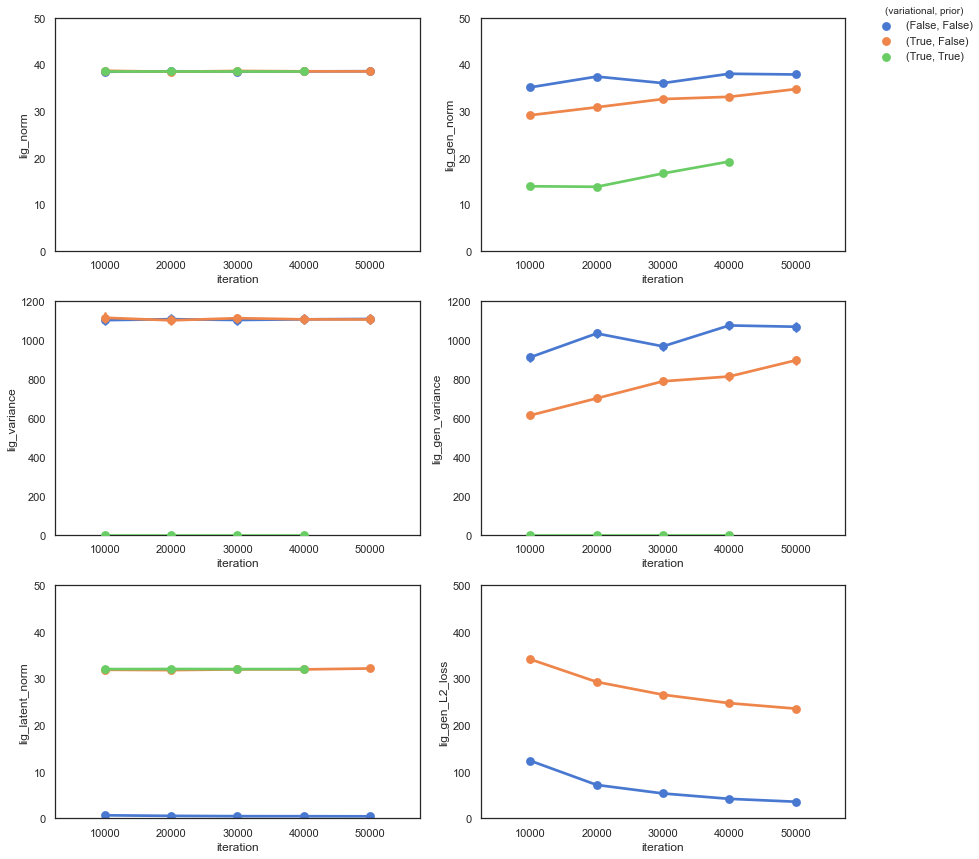

In [23]:
from results import plot_strips

x = 'iteration'
hue = vae_prior

y = [ # density grid metrics
    'lig_norm',        'lig_gen_norm', 
    'lig_variance',    'lig_gen_variance', 
    'lig_latent_norm', 'lig_gen_L2_loss',
]

ylim = [[0,   50], [0,   50],
        [0, 1200], [0, 1200],
        [0,   50], [0,  500]]

fig = plot_strips('fit_molport_grid_strips.png', plot_df, x=x, y=y, hue=hue,
                  n_cols=2, height=4, width=6, point=True, ylim=ylim)
print()
print(46*' ' + 'Atom density grid metrics')
print(30*' ' + 'lig' + 50*' ' + 'lig_gen')


                                                Atom fitting metrics
                              lig                                                  lig_gen


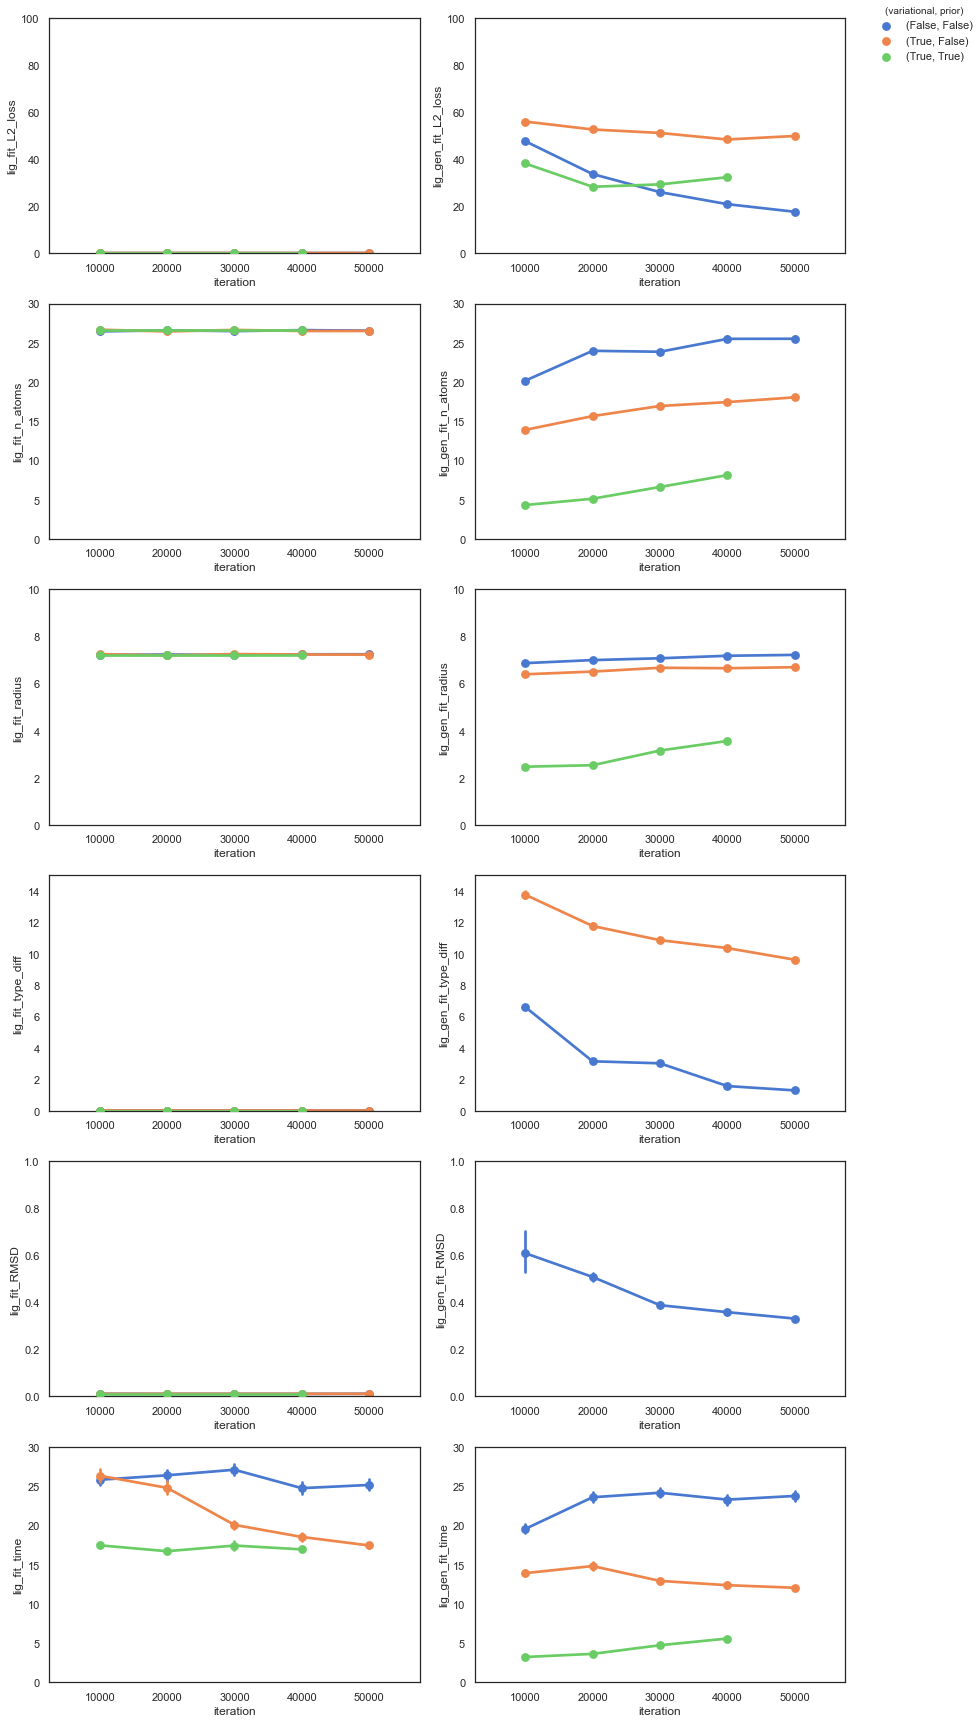

In [24]:
y = [ # atom fitting metrics
    'lig_fit_L2_loss',    'lig_gen_fit_L2_loss',
    'lig_fit_n_atoms',    'lig_gen_fit_n_atoms',
    'lig_fit_radius',     'lig_gen_fit_radius',
    'lig_fit_type_diff',  'lig_gen_fit_type_diff',
    'lig_fit_RMSD',       'lig_gen_fit_RMSD',
    'lig_fit_time',       'lig_gen_fit_time',   
]

ylim = [[0, 100], [0, 100],
        [0,  30], [0,  30],
        [0,  10], [0,  10],
        [0,  15], [0,  15],
        [0,   1], [0,   1],
        [0,  30], [0,  30]]

fig = plot_strips('fit_molport_fit_strips.png', plot_df, x=x, y=y, hue=hue,
                  n_cols=2, height=4, width=6, point=True, ylim=ylim)
print()
print(48*' ' + 'Atom fitting metrics')
print(30*' ' + 'lig' + 50*' ' + 'lig_gen')


                                                 Molecular validity
                              lig                                                  lig_gen


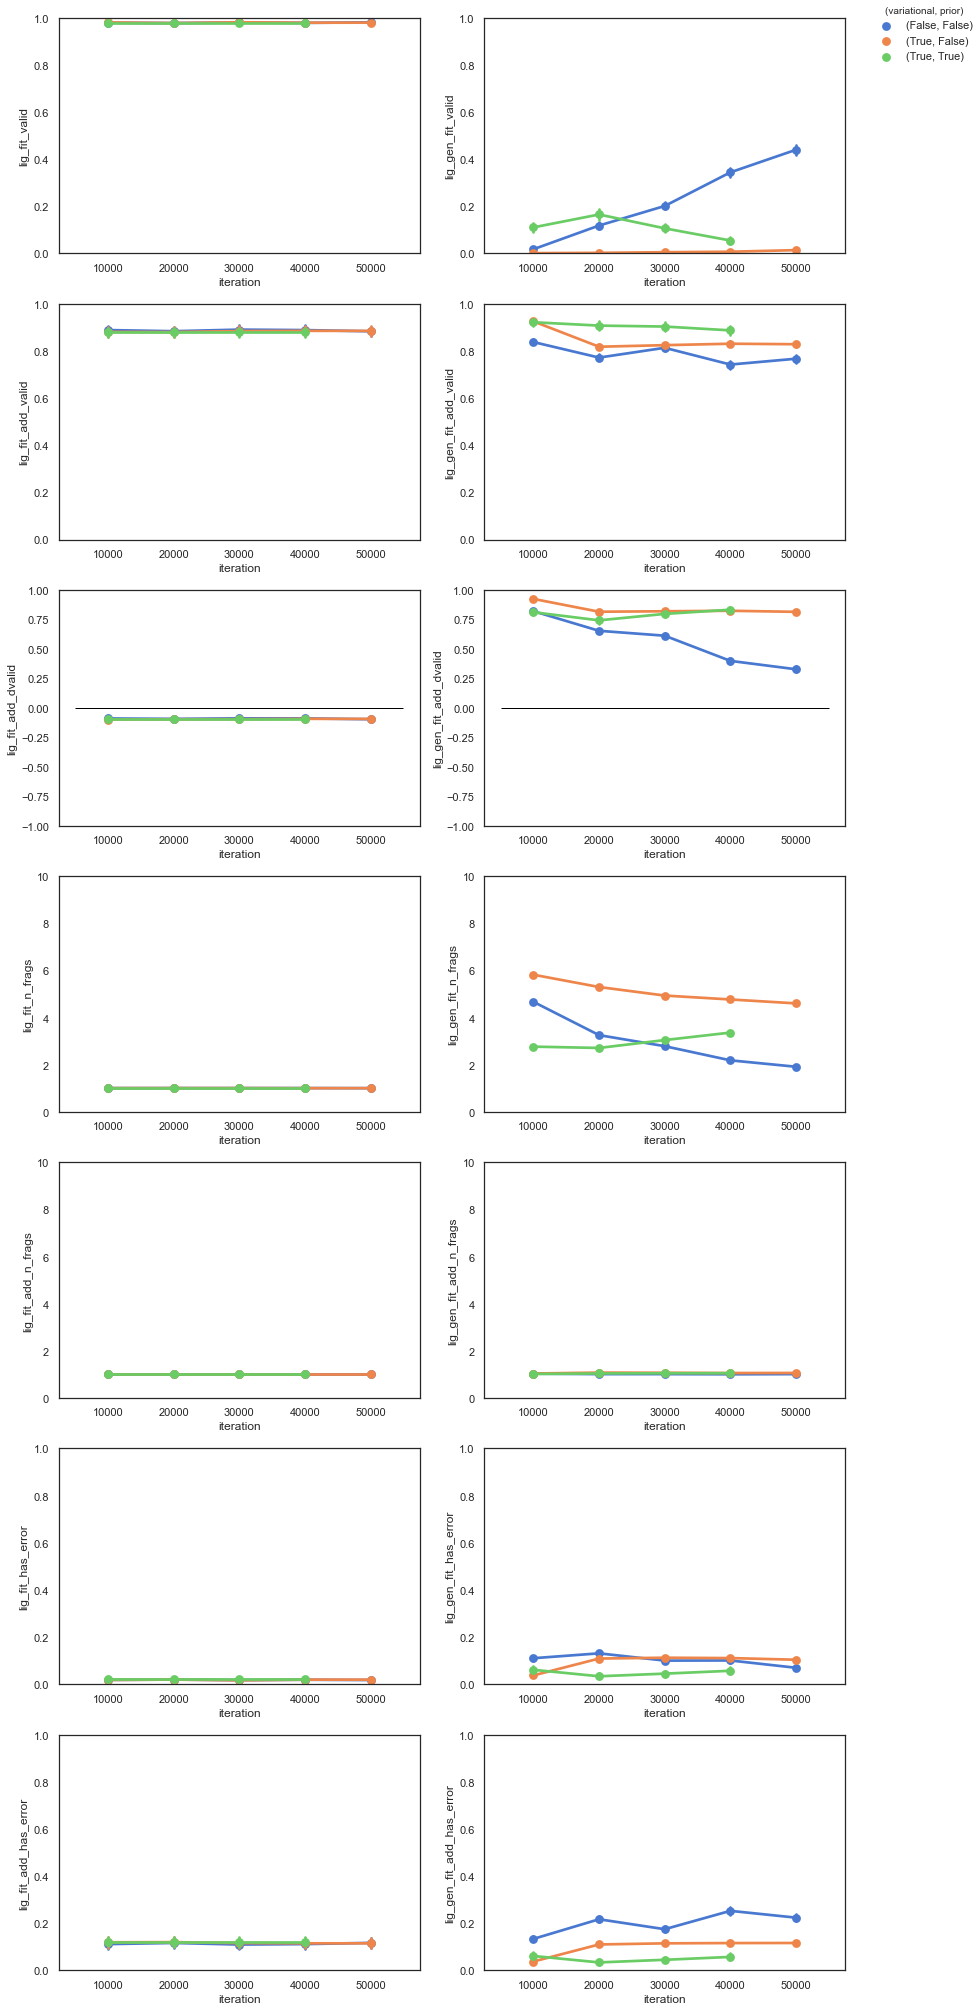

In [25]:
y = [ # mol validity metrics
    'lig_fit_valid',         'lig_gen_fit_valid',
    'lig_fit_add_valid',     'lig_gen_fit_add_valid',
    'lig_fit_add_dvalid',    'lig_gen_fit_add_dvalid',
    'lig_fit_n_frags',       'lig_gen_fit_n_frags',
    'lig_fit_add_n_frags',   'lig_gen_fit_add_n_frags',
    'lig_fit_has_error',     'lig_gen_fit_has_error',
    'lig_fit_add_has_error', 'lig_gen_fit_add_has_error'
]

ylim = [[0,  1], [0,  1],
        [0,  1], [0,  1],
        [-1, 1], [-1, 1],
        [0, 10], [0, 10],
        [0, 10], [0, 10],
        [0,  1], [0,  1],
        [0,  1], [0,  1]]

fig = plot_strips('fit_molport_valid_strips.png', plot_df, x=x, y=y, hue=hue,
                  n_cols=2, height=4, width=6, point=True, ylim=ylim)
print()
print(49*' ' + 'Molecular validity')
print(30*' ' + 'lig' + 50*' ' + 'lig_gen')


                                                 Molecular similarity
                              lig                                                  lig_gen


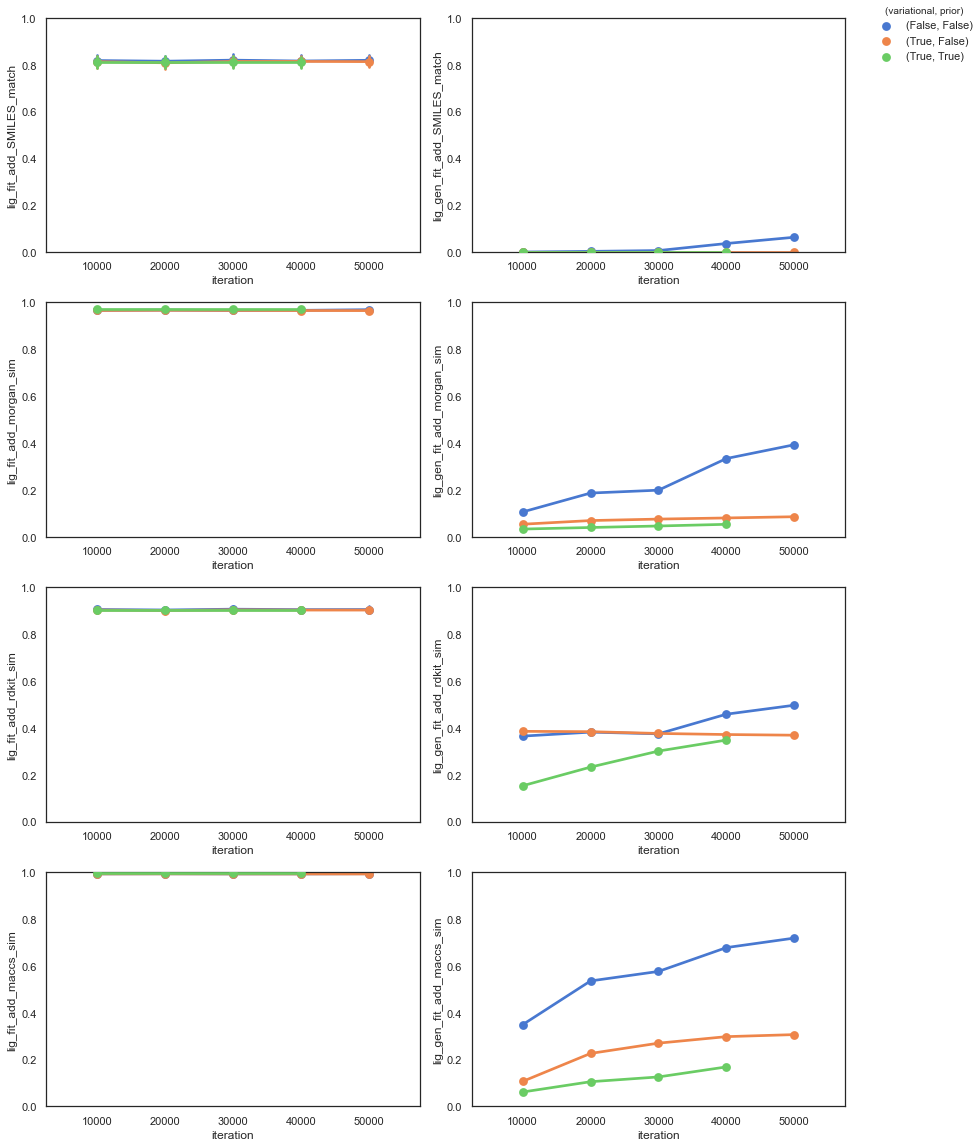

In [26]:
y = [ # mol similarity metrics
    'lig_fit_add_SMILES_match', 'lig_gen_fit_add_SMILES_match',
    'lig_fit_add_morgan_sim',   'lig_gen_fit_add_morgan_sim',
    'lig_fit_add_rdkit_sim',    'lig_gen_fit_add_rdkit_sim',
    'lig_fit_add_maccs_sim',    'lig_gen_fit_add_maccs_sim',
]

ylim = [[0, 1], [0, 1],
        [0, 1], [0, 1],
        [0, 1], [0, 1],
        [0, 1], [0, 1]]

fig = plot_strips('fit_molport_sim_strips.png', plot_df, x=x, y=y, hue=hue,
                  n_cols=2, height=4, width=6, point=True, ylim=ylim)
print()
print(49*' ' + 'Molecular similarity')
print(30*' ' + 'lig' + 50*' ' + 'lig_gen')


                                                 Drug-likeness metrics
                              lig                                                  lig_gen


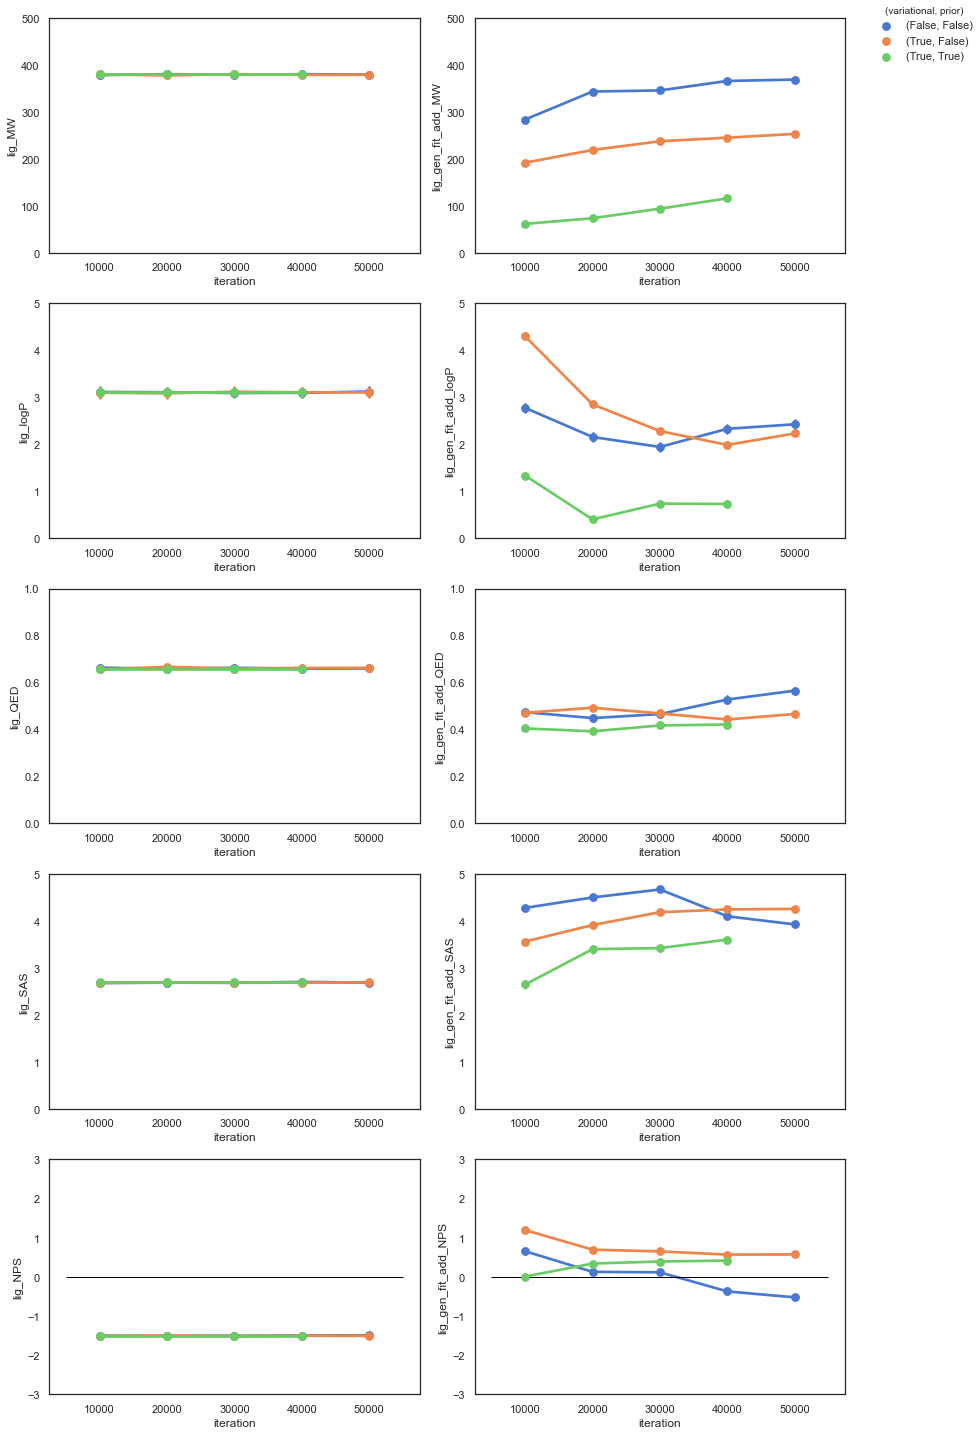

In [27]:
# NOTE for drug-likeness and energy minimization, this is comparing to the
# actual true ligand, or the true ligand gninatypes with OB bonds perceived,
# not the result of atom fitting and bond adding to a true ligand density

y = [ # drug-likeness metrics
     'lig_MW',   'lig_gen_fit_add_MW',
     'lig_logP', 'lig_gen_fit_add_logP',
     'lig_QED',  'lig_gen_fit_add_QED',
     'lig_SAS',  'lig_gen_fit_add_SAS',
     'lig_NPS',  'lig_gen_fit_add_NPS',
]

ylim = [[ 0, 500],  [ 0, 500],
        [ 0,   5],  [ 0,   5],
        [ 0,   1],  [ 0,   1],
        [ 0,   5],  [ 0,   5],
        [-3,   3],  [-3,   3]]

fig = plot_strips('fit_molport_drug_strips.png', plot_df, x=x, y=y, hue=hue,
                  n_cols=2, height=4, width=6, point=True, ylim=ylim)
print()
print(49*' ' + 'Drug-likeness metrics')
print(30*' ' + 'lig' + 50*' ' + 'lig_gen')


                                                 Energy minimization
                              lig                                                  lig_gen


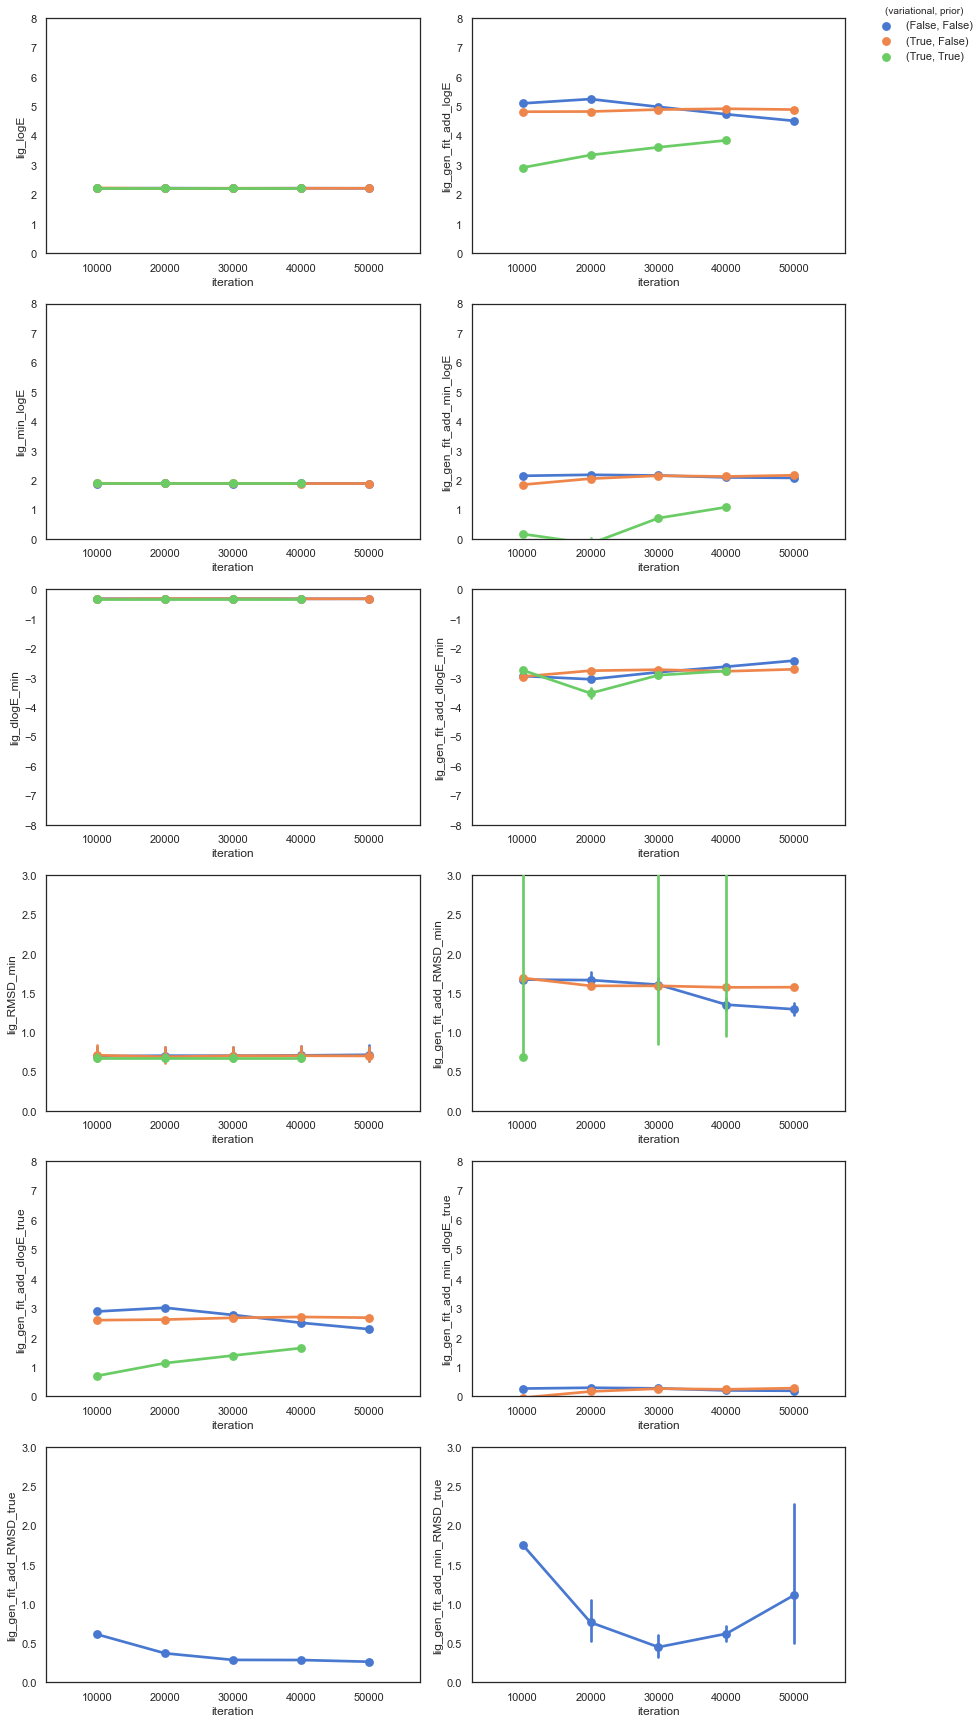

In [29]:
y = [ # energy minimization metrics
    'lig_logE',                   'lig_gen_fit_add_logE',
    'lig_min_logE',               'lig_gen_fit_add_min_logE',
    'lig_dlogE_min',              'lig_gen_fit_add_dlogE_min',
    'lig_RMSD_min',               'lig_gen_fit_add_RMSD_min',
    'lig_gen_fit_add_dlogE_true', 'lig_gen_fit_add_min_dlogE_true',
    'lig_gen_fit_add_RMSD_true',  'lig_gen_fit_add_min_RMSD_true',
]

ylim = [
    [ 0, 8], [ 0, 8],
    [ 0, 8], [ 0, 8],
    [-8, 0], [-8, 0],
    [ 0, 3], [ 0, 3],
    [ 0, 8], [ 0, 8],
    [ 0, 3], [ 0, 3]
]

fig = plot_strips('fit_molport_Emin_strips.png', plot_df, x=x, y=y, hue=hue,
                  n_cols=2, height=4, width=6, point=True, ylim=ylim)
print()
print(49*' ' + 'Energy minimization')
print(30*' ' + 'lig' + 50*' ' + 'lig_gen')

In [87]:
pd.set_option('display.max_columns', None)

job_name = 'ae_disc_x_0_50000_r_none'
index_cols = ['lig_name', 'array_idx']
sort_col = 'lig_gen_fit_add_dvalid'

plot_df[plot_df['job_name'] == job_name] \
    .set_index(index_cols).sort_values(by=sort_col)

variational disc_loss_type random_seed  iteration  \
lig_name     array_idx                                                      
6040277_1    271              False              x           0      50000   
74889799_2   246              False              x           0      50000   
200112787_7  485              False              x           0      50000   
4819267_15   294              False              x           0      50000   
1664318_12   253              False              x           0      50000   
...                             ...            ...         ...        ...   
210460403_4  691              False              x           0      50000   
775829_5     851              False              x           0      50000   
206478049_9  102              False              x           0      50000   
161601824_14 429              False              x           0      50000   
102906000_8  685              False              x           0      50000   

                       atom_init  sample_idx   lig_norm  lig_gen_norm  \
lig_name     array_idx                                                  
6040277_1    271            none         4.5  40.182765     39.581969   
74889799_2   246            none         4.5  28.594097     28.771192   
200112787_7  485            none         4.5  35.794313     34.763147   
4819267_15   294            none         4.5  39.486312     39.282917   
1664318_12   253            none         4.5  38.156130     37.554781   
...                          ...         ...        ...           ...   
210460403_4  691            none         4.5  55.468757     51.908174   
775829_5     851            none         4.5  22.706479     21.356884   
206478049_9  102            none         4.5  39.891492     38.710975   
161601824_14 429            none         4.5  32.667785     31.372068   
102906000_8  685            none         4.5  45.801179     44.995654   

                        lig_latent_norm  lig_gen_L2_loss  lig_variance  \
lig_name     array_idx                                                   
6040277_1    271               0.402632        29.006185   1102.247845   
74889799_2   246               0.323717        11.796806    506.777979   
200112787_7  485               0.397793        26.722416    921.458453   
4819267_15   294               0.450552        26.230767   1117.834473   
1664318_12   253               0.381037        12.407882    832.739038   
...                                 ...              ...           ...   
210460403_4  691               0.515735       108.573389   2311.703455   
775829_5     851               0.258750        29.908996    236.310956   
206478049_9  102               0.414825        38.148574   1126.412512   
161601824_14 429               0.330487        41.811723    795.698895   
102906000_8  685               0.499460        68.286914   1472.357568   

                        lig_gen_variance  lig_fit_L2_loss  lig_n_atoms  \
lig_name     array_idx                                                   
6040277_1    271             1057.698871         0.027726         24.0   
74889799_2   246              506.845615         0.000061         16.0   
200112787_7  485              863.166309         0.000084         25.0   
4819267_15   294             1096.809790         0.000095         28.0   
1664318_12   253              820.346906         0.019913         21.0   
...                                  ...              ...          ...   
210460403_4  691             2042.453650         0.455213         39.0   
775829_5     851              207.252083         0.000036         13.0   
206478049_9  102             1065.673096         0.014024         26.0   
161601824_14 429              745.333881         0.000064         20.0   
102906000_8  685             1429.495581         0.000308         35.0   

                        lig_fit_n_atoms  lig_radius  lig_fit_radius  \
lig_name     array_idx                                                
6040